**Histórico dos dados dos fundos imobiliários**
* https://dados.cvm.gov.br/dataset/fii-doc-inf_mensal
* https://dados.cvm.gov.br/dataset/fii-doc-inf_trimestral
* https://dados.cvm.gov.br/dataset/fii-doc-inf_anual

---
O arquivo zipado 'inf_mensal_fii_XXXX' contém vários arquivos excel. Os arquivos que eu tenho interesse são:
* inf_mensal_fii_ativo_passivo_XXXX: contém os dados sobre "Obrigacoes_Aquisicao_Imoveis" e "Obrigacoes_Securitizacao_Recebiveis";
* inf_mensal_fii_complemento_XXXX: contém o dado sobre "Valor_Ativo".

In [1]:
from funcoes import *
import glob
import matplotlib.pyplot as plt
import os
import plotly.express as px
import zipfile

## Extraindo os arquivos zipados

### Extração dos arquivos "inf_mensal_fii_ativo_passivo_XXXX" e "inf_mensal_fii_complemento_XXXX"

In [2]:
# Mês e ano escolhido
ano = '2025'

# Nome do arquivo zipado
zip_filename = f'C://Users//vitor//projetos_python//python_b3//historico-arquivos//fundos_investimentos//fii_cvm_zip//inf_mensal_fii_{ano}.zip'

# # Visualizando a lista dos nomes dos arquivos dentro do arquivo zipado
# with zipfile.ZipFile(zip_filename, 'r') as zip_ref:
#     print("Arquivos dentro do arquivo zipado:")
#     print(zip_ref.namelist())

# Lista dos nomes dos arquivos que você deseja extrair
arquivos_a_extrair = [
    f'inf_mensal_fii_ativo_passivo_{ano}.csv', 
    f'inf_mensal_fii_complemento_{ano}.csv', 
    f'inf_mensal_fii_geral_{ano}.csv'
]

# Caminho do diretório do diretório do arquivo não zipado
destino_dir = f'C://Users//vitor//projetos_python//python_b3//historico-arquivos//fundos_investimentos//fii_cvm//{ano}'

# Abrindo o arquivo zipado
with zipfile.ZipFile(zip_filename, 'r') as zip_ref:
    # Extraindo os arquivos selecionados para um diretório específico
    for arquivo in arquivos_a_extrair:
        zip_ref.extract(arquivo, destino_dir)

        # Caminhos dos arquivos em formato csv e parquet
        csv_path = f'{destino_dir}//{arquivo}'
        parquet_path = f'{destino_dir}//{arquivo.replace(".csv", ".parquet")}'

        # Lendo os arquivos csv
        df = pd.read_csv(csv_path, sep=';', encoding='ISO-8859-1', low_memory=False)

        # Transformando esses arquivos em parquet
        df.to_parquet(parquet_path)

# Entrando para o diretório especificado
os.chdir(destino_dir)

# Encontrando todos os arquivos .csv no diretório
arquivos_csv = glob.glob('*.csv')

# Loop para deletar cada arquivo csv encontrado
for arquivo in arquivos_csv:
    os.remove(arquivo)

## Fundos Imobiliários

In [3]:
# Lendo o arquivo da composição do IFIX
ifix_mai_ago_2024 = filtro_etf(path='C://Users//vitor//projetos_python//python_b3//composicao-fundos-de-investimentos//fundo_imobiliario//ifix//IFIX_2024_MAI_AGO.csv')
ifix_set_dez_2024 = filtro_etf(path='C://Users//vitor//projetos_python//python_b3//composicao-fundos-de-investimentos//fundo_imobiliario//ifix//IFIX_2024_SET_DEZ.csv')
ifix_jan_abr_2025 = filtro_etf(path='C://Users//vitor//projetos_python//python_b3//composicao-fundos-de-investimentos//fundo_imobiliario//ifix//IFIX_2025_JAN_ABR.csv')
ifix_mai_ago_2025 = filtro_etf(path='C://Users//vitor//projetos_python//python_b3//composicao-fundos-de-investimentos//fundo_imobiliario//ifix//IFIX_2025_MAI_AGO.csv')

# Ordenando o df pela ordem alfabética dos tickers
ifix_mai_ago_2024 = ifix_mai_ago_2024.sort_values('Código')
ifix_set_dez_2024 = ifix_set_dez_2024.sort_values('Código')
ifix_jan_abr_2025 = ifix_jan_abr_2025.sort_values('Código')
ifix_mai_ago_2025 = ifix_mai_ago_2025.sort_values('Código')

# Transformando em listas
lista_ifix_atual = ifix_mai_ago_2025['Código'].tolist()
lista_ifix_anterior = ifix_jan_abr_2025['Código'].tolist()

# Diferença entre as carteiras
fiis_sairam_carteira_atual = sorted(set(lista_ifix_anterior) - set(lista_ifix_atual))
fiis_entraram_carteira_atual = sorted(set(lista_ifix_atual) - set(lista_ifix_anterior))

print(f'A carteira teórioca do IFIX atual é composta por {len(lista_ifix_atual)} ações.')
print(f'A carteira teórioca do IFIX anterior é composta por {len(lista_ifix_anterior)} ações.')
print('-'*30)
print(f'O número de ações semelhantes são de {len(set(lista_ifix_atual) & set(lista_ifix_anterior))}.')
print(f'Ações semelhantes entre as duas carteiras: {sorted(set(lista_ifix_atual) & set(lista_ifix_anterior))}.')
print('-'*30)
print(f'Número de ações diferentes entre as duas carteiras: {len(set(lista_ifix_anterior) - set(lista_ifix_atual))}.')
print(f'FIIs que sairam da carteira atual: {fiis_sairam_carteira_atual}')
print(f'FIIs que entraram na carteira atual: {fiis_entraram_carteira_atual}')

A carteira teórioca do IFIX atual é composta por 117 ações.
A carteira teórioca do IFIX anterior é composta por 117 ações.
------------------------------
O número de ações semelhantes são de 113.
Ações semelhantes entre as duas carteiras: ['AFHI11', 'AIEC11', 'AJFI11', 'ALZR11', 'ARRI11', 'BARI11', 'BBIG11', 'BCIA11', 'BCRI11', 'BLMG11', 'BPML11', 'BRCO11', 'BRCR11', 'BROF11', 'BTAL11', 'BTCI11', 'BTLG11', 'CACR11', 'CCME11', 'CLIN11', 'CPSH11', 'CPTS11', 'CVBI11', 'CYCR11', 'DEVA11', 'FATN11', 'GARE11', 'GGRC11', 'GTWR11', 'GZIT11', 'HABT11', 'HCTR11', 'HFOF11', 'HGBS11', 'HGCR11', 'HGFF11', 'HGLG11', 'HGPO11', 'HGRE11', 'HGRU11', 'HSAF11', 'HSLG11', 'HSML11', 'HTMX11', 'ICRI11', 'IRDM11', 'ITRI11', 'JSAF11', 'JSRE11', 'KCRE11', 'KFOF11', 'KISU11', 'KIVO11', 'KNCR11', 'KNHF11', 'KNHY11', 'KNIP11', 'KNRI11', 'KNSC11', 'KNUQ11', 'KORE11', 'LIFE11', 'LVBI11', 'MALL11', 'MANA11', 'MCCI11', 'MCRE11', 'MFII11', 'MXRF11', 'OUJP11', 'PATL11', 'PORD11', 'PVBI11', 'RBFF11', 'RBRF11', 'RBRL11', 

* Esses CNPJs do "dict_cnpj" foram adicionados na mão. Eu não achei uma maneira de automatizar esse processo.

In [4]:
# IFIX 2024 (MAI-AGO)
dict_cnpj_mai_ago_2024 = {
    'KNIP11':'24.960.430/0001-13',
    'XPML11':'28.757.546/0001-00',
    'KNCR11':'16.706.958/0001-32',
    'HGLG11':'11.728.688/0001-47',
    'KNRI11':'12.005.956/0001-65',
    'BTLG11':'11.839.593/0001-09',
    'VISC11':'17.554.274/0001-25',
    'MXRF11':'97.521.225/0001-25',
    'XPLG11':'26.502.794/0001-85',
    'KNHY11':'30.130.708/0001-28',
    'HGBS11':'08.431.747/0001-06',
    'IRDM11':'28.830.325/0001-10',
    'CPTS11':'18.979.895/0001-13',
    'PVBI11':'35.652.102/0001-76',
    'HGRU11':'29.641.226/0001-53',
    'TGAR11':'25.032.881/0001-53',
    'RECR11':'28.152.272/0001-26',
    'BRCO11':'20.748.515/0001-81',
    'HSML11':'32.892.018/0001-31',
    'KNHF11':'42.754.342/0001-47',
    'TRXF11':'28.548.288/0001-52',
    'LVBI11':'30.629.603/0001-18',
    'BCFF11':'11.026.627/0001-38',
    'RZTR11':'36.501.128/0001-86',
    'HFOF11':'18.307.582/0001-19',
    'TVRI11':'14.410.722/0001-29',
    'HGCR11':'11.160.521/0001-22',
    'MCCI11':'23.648.935/0001-84',
    'VGHF11':'36.771.692/0001-19',
    'MALL11':'26.499.833/0001-32',
    'BRCR11':'08.924.783/0001-01',
    'HGRE11':'09.072.017/0001-29',
    'JSRE11':'13.371.132/0001-71',
    'RBRY11':'30.166.700/0001-11',
    'VILG11':'24.853.044/0001-22',
    'RBRR11':'29.467.977/0001-03',
    'RBVA11':'15.576.907/0001-70',
    'VCJR11':'32.400.250/0001-05',
    'VRTA11':'11.664.201/0001-00',
    'KNSC11':'35.864.448/0001-38',
    'ALZR11':'28.737.771/0001-85',
    'GARE11':'37.295.919/0001-60',
    'GGRC11':'26.614.291/0001-00',
    'HSLG11':'32.903.621/0001-71',
    'RBRF11':'27.529.279/0001-51',
    'VGIP11':'34.197.811/0001-46',
    'MCHY11':'36.655.973/0001-06',
    'CVBI11':'28.729.197/0001-13',
    'KORE11':'52.219.978/0001-42',
    'BTCI11':'09.552.812/0001-14',
    'GTWR11':'23.740.527/0001-58',
    'VGIR11':'29.852.732/0001-91',
    'URPR11':'34.508.872/0001-87',
    'RVBI11':'35.507.457/0001-71',
    'TRBL11':'16.671.412/0001-93',
    'RZAK11':'36.642.219/0001-31',
    'XPCI11':'28.516.301/0001-91',
    'JSAF11':'42.085.661/0001-07',
    'RBRP11':'21.408.063/0001-51',
    'HABT11':'30.578.417/0001-05',
    'HCTR11':'30.248.180/0001-96',
    'DEVA11':'37.087.810/0001-37',
    'VINO11':'12.516.185/0001-70',
    'BROF11':'48.978.859/0001-04',
    'RCRB11':'03.683.056/0001-86',
    'XPIN11':'28.516.325/0001-40',
    'RBRL11':'35.705.463/0001-33',
    'HGPO11':'11.260.134/0001-68',
    'MFII11':'16.915.968/0001-88',
    'BCRI11':'22.219.335/0001-38',
    'SARE11':'32.903.702/0001-71',
    'KFOF11':'30.091.444/0001-40',
    'CLIN11':'49.005.348/0001-60',
    'BTAL11':'36.642.244/0001-15',
    'TEPP11':'26.681.370/0001-25',
    'SNCI11':'41.076.710/0001-82',
    'CACR11':'32.065.364/0001-46',
    'AFHI11':'36.642.293/0001-58',
    'BCIA11':'20.216.935/0001-17',
    'BARI11':'29.267.567/0001-00',
    'KISU11':'36.669.660/0001-07',
    'RZAT11':'28.267.696/0001-36',
    'XPSF11':'30.983.020/0001-90',
    'KCRE11':'42.502.802/0001-40',
    'PORD11':'17.156.502/0001-09',
    'RECT11':'32.274.163/0001-59',
    'BPFF11':'17.324.357/0001-28',
    'PATL11':'35.754.164/0001-99',
    'LGCP11':'34.598.181/0001-11',
    'OUJP11':'26.091.656/0001-50',
    'AJFI11':'51.472.985/0001-99',
    'RBRX11':'41.088.458/0001-21',
    'HTMX11':'08.706.065/0001-69',
    'AIEC11':'35.765.826/0001-26',
    'HGFF11':'32.784.898/0001-22',
    'SNFF11':'40.011.225/0001-68',
    'WHGR11':'41.256.643/0001-88',
    'RBFF11':'17.329.029/0001-14',
    'FATN11':'30.567.216/0001-02',
    'HSAF11':'35.360.687/0001-50',
    'CPFF11':'34.081.611/0001-23',
    'SPXS11':'43.010.543/0001-00',
    'VIUR11':'36.445.587/0001-90',
    'PLCR11':'32.527.683/0001-26',
    'BTRA11':'41.076.607/0001-32',
    'BLMG11':'34.081.637/0001-71',
    'ARRI11':'32.006.821/0001-21',
    'CYCR11':'36.501.233/0001-15',
    'XPPR11':'30.654.849/0001-40',
    'NCHB11':'18.085.673/0001-57',
    'VSLH11':'36.244.015/0001-42',
    'TORD11':'30.230.870/0001-18'
}

# IFIX 2024 (SET-DEZ)
dict_cnpj_set_dez_2024 = {
    'KNIP11':'24.960.430/0001-13',
    'KNCR11':'16.706.958/0001-32',
    'XPML11':'28.757.546/0001-00',
    'HGLG11':'11.728.688/0001-47',
    'BTLG11':'11.839.593/0001-09',
    'MXRF11':'97.521.225/0001-25',
    'KNRI11':'12.005.956/0001-65',
    'HGRU11':'29.641.226/0001-53',
    'VISC11':'17.554.274/0001-25',
    'XPLG11':'26.502.794/0001-85',
    'KNHY11':'30.130.708/0001-28',
    'TGAR11':'25.032.881/0001-53',
    'HGBS11':'08.431.747/0001-06',
    'IRDM11':'28.830.325/0001-10',
    'CPTS11':'18.979.895/0001-13',
    'PVBI11':'35.652.102/0001-76',
    'RECR11':'28.152.272/0001-26',
    'TRXF11':'28.548.288/0001-52',
    'HSML11':'32.892.018/0001-31',
    'KNHF11':'42.754.342/0001-47',
    'BRCO11':'20.748.515/0001-81',
    'LVBI11':'30.629.603/0001-18',
    'RZTR11':'36.501.128/0001-86',
    'KNSC11':'35.864.448/0001-38',
    'BCFF11':'11.026.627/0001-38',
    'TVRI11':'14.410.722/0001-29',
    'KNUQ11':'42.754.362/0001-18',
    'HFOF11':'18.307.582/0001-19',
    'HGCR11':'11.160.521/0001-22',
    'VGIR11':'29.852.732/0001-91',
    'MCCI11':'23.648.935/0001-84',
    'VGHF11':'36.771.692/0001-19',
    'MALL11':'26.499.833/0001-32',
    'VRTA11':'11.664.201/0001-00',
    'RBRR11':'29.467.977/0001-03',
    'VCJR11':'32.400.250/0001-05',
    'BRCR11':'08.924.783/0001-01',
    'HGRE11':'09.072.017/0001-29',
    'RBVA11':'15.576.907/0001-70',
    'JSRE11':'13.371.132/0001-71',
    'ALZR11':'28.737.771/0001-85',
    'VILG11':'24.853.044/0001-22',
    'GZIT11':'15.447.108/0001-02',
    'RBRY11':'30.166.700/0001-11',
    'GGRC11':'26.614.291/0001-00',
    'GARE11':'37.295.919/0001-60',
    'HSLG11':'32.903.621/0001-71',
    'MCHY11':'36.655.973/0001-06',
    'VGIP11':'34.197.811/0001-46',
    'CVBI11':'28.729.197/0001-13',
    'RBRF11':'27.529.279/0001-51',
    'KORE11':'52.219.978/0001-42',
    'BTCI11':'09.552.812/0001-14',
    'GTWR11':'23.740.527/0001-58',
    'URPR11':'34.508.872/0001-87',
    'JSAF11':'42.085.661/0001-07',
    'RVBI11':'35.507.457/0001-71',
    'XPCI11':'28.516.301/0001-91',
    'TRBL11':'16.671.412/0001-93',
    'RZAK11':'36.642.219/0001-31',
    'HABT11':'30.578.417/0001-05',
    'RBRP11':'21.408.063/0001-51',
    'CPSH11':'47.896.665/0001-99',
    'BPML11':'33.046.142/0001-49',
    'HCTR11':'30.248.180/0001-96',
    'KFOF11':'30.091.444/0001-40',
    'DEVA11':'37.087.810/0001-37',
    'XPIN11':'28.516.325/0001-40',
    'BROF11':'48.978.859/0001-04',
    'MFII11':'16.915.968/0001-88',
    'RBRL11':'35.705.463/0001-33',
    'HGPO11':'11.260.134/0001-68',
    'CACR11':'32.065.364/0001-46',
    'VINO11':'12.516.185/0001-70',
    'RCRB11':'03.683.056/0001-86',
    'BTAL11':'36.642.244/0001-15',
    'AFHI11':'36.642.293/0001-58',
    'BCRI11':'22.219.335/0001-38',
    'CLIN11':'49.005.348/0001-60',
    'SNCI11':'41.076.710/0001-82',
    'BCIA11':'20.216.935/0001-17',
    'TEPP11':'26.681.370/0001-25',
    'SARE11':'32.903.702/0001-71',
    'BARI11':'29.267.567/0001-00',
    'RZAT11':'28.267.696/0001-36',
    'KISU11':'36.669.660/0001-07',
    'KCRE11':'42.502.802/0001-40',
    'MANA11':'42.888.583/0001-89',
    'PORD11':'17.156.502/0001-09',
    'XPSF11':'30.983.020/0001-90',
    'FATN11':'30.567.216/0001-02',
    'BPFF11':'17.324.357/0001-28',
    'PATL11':'35.754.164/0001-99',
    'WHGR11':'41.256.643/0001-88',
    'LGCP11':'34.598.181/0001-11',
    'RECT11':'32.274.163/0001-59',
    'HTMX11':'08.706.065/0001-69',
    'RBRX11':'41.088.458/0001-21',
    'AIEC11':'35.765.826/0001-26',
    'AJFI11':'51.472.985/0001-99',
    'OUJP11':'26.091.656/0001-50',
    'SNFF11':'40.011.225/0001-68',
    'HGFF11':'32.784.898/0001-22',
    'RBFF11':'17.329.029/0001-14',
    'HSAF11':'35.360.687/0001-50',
    'SPXS11':'43.010.543/0001-00',
    'BLMG11':'34.081.637/0001-71',
    'KIVO11':'42.273.325/0001-98',
    'VIUR11':'36.445.587/0001-90',
    'SNEL11':'43.741.171/0001-84',
    'ARRI11':'32.006.821/0001-21',
    'CYCR11':'36.501.233/0001-15',
    'BTRA11':'41.076.607/0001-32',
    'ZAVI11':'40.575.940/0001-23',
    'VSLH11':'36.244.015/0001-42'
}

# IFIX 2025 (JAN-ABR)
dict_cnpj_jan_abr_2025 = {
    'KNCR11':'16.706.958/0001-32',
    'KNIP11':'24.960.430/0001-13',
    'XPML11':'28.757.546/0001-00',
    'HGLG11':'11.728.688/0001-47',
    'BTLG11':'11.839.593/0001-09',
    'MXRF11':'97.521.225/0001-25',
    'KNRI11':'12.005.956/0001-65',
    'XPLG11':'26.502.794/0001-85',
    'KNHY11':'30.130.708/0001-28',
    'VISC11':'17.554.274/0001-25',
    'HGRU11':'29.641.226/0001-53',
    'HGBS11':'08.431.747/0001-06',
    'IRDM11':'28.830.325/0001-10',
    'CPTS11':'18.979.895/0001-13',
    'PVBI11':'35.652.102/0001-76',
    'TGAR11':'25.032.881/0001-53',
    'TRXF11':'28.548.288/0001-52',
    'RECR11':'28.152.272/0001-26',
    'KNSC11':'35.864.448/0001-38',
    'KNHF11':'42.754.342/0001-47',
    'RZTR11':'36.501.128/0001-86',
    'BRCO11':'20.748.515/0001-81',
    'KNUQ11':'42.754.362/0001-18',
    'LVBI11':'30.629.603/0001-18',
    'GARE11':'37.295.919/0001-60',
    'HSML11':'32.892.018/0001-31',
    'HGCR11':'11.160.521/0001-22',
    'TVRI11':'14.410.722/0001-29',
    'RBVA11':'15.576.907/0001-70',
    'VGIR11':'29.852.732/0001-91',
    'MCCI11':'23.648.935/0001-84',
    'HFOF11':'18.307.582/0001-19',
    'MALL11':'26.499.833/0001-32',
    'RBRR11':'29.467.977/0001-03',
    'VGHF11':'36.771.692/0001-19',
    'ALZR11':'28.737.771/0001-85',
    'VRTA11':'11.664.201/0001-00',
    'HGRE11':'09.072.017/0001-29',
    'GGRC11':'26.614.291/0001-00',
    'JSRE11':'13.371.132/0001-71',
    'RBRY11':'30.166.700/0001-11',
    'VCJR11':'32.400.250/0001-05',
    'VILG11':'24.853.044/0001-22',
    'BRCR11':'08.924.783/0001-01',
    'HSLG11':'32.903.621/0001-71',
    'VGIP11':'34.197.811/0001-46',
    'GZIT11':'15.447.108/0001-02',
    'CVBI11':'28.729.197/0001-13',
    'RBRF11':'27.529.279/0001-51',
    'BTCI11':'09.552.812/0001-14',
    'MCRE11':'36.655.973/0001-06',
    'GTWR11':'23.740.527/0001-58',
    'BBIG11':'54.375.187/0001-37',
    'KORE11':'52.219.978/0001-42',
    'CPSH11':'47.896.665/0001-99',
    'RZAK11':'36.642.219/0001-31',
    'URPR11':'34.508.872/0001-87',
    'XPCI11':'28.516.301/0001-91',
    'RVBI11':'35.507.457/0001-71',
    'HABT11':'30.578.417/0001-05',
    'RBRP11':'21.408.063/0001-51',
    'SNEL11':'43.741.171/0001-84',
    'CCME11':'43.010.844/0001-26',
    'JSAF11':'42.085.661/0001-07',
    'BPML11':'33.046.142/0001-49',
    'TRBL11':'16.671.412/0001-93',
    'BROF11':'48.978.859/0001-04',
    'HTMX11':'08.706.065/0001-69',
    'XPIN11':'28.516.325/0001-40',
    'KFOF11':'30.091.444/0001-40',
    'RCRB11':'03.683.056/0001-86',
    'MFII11':'16.915.968/0001-88',
    'RBRL11':'35.705.463/0001-33',
    'ITRI11':'52.270.671/0001-76',
    'DEVA11':'37.087.810/0001-37',
    'HCTR11':'30.248.180/0001-96',
    'AFHI11':'36.642.293/0001-58',
    'BTAL11':'36.642.244/0001-15',
    'CACR11':'32.065.364/0001-46',
    'VINO11':'12.516.185/0001-70',
    'SNCI11':'41.076.710/0001-82',
    'CLIN11':'49.005.348/0001-60',
    'RZAT11':'28.267.696/0001-36',
    'BCRI11':'22.219.335/0001-38',
    'SNFF11':'40.011.225/0001-68',
    'SARE11':'32.903.702/0001-71',
    'TEPP11':'26.681.370/0001-25',
    'ICRI11':'51.294.441/0001-84',
    'BARI11':'29.267.567/0001-00',
    'KCRE11':'42.502.802/0001-40',
    'BCIA11':'20.216.935/0001-17',
    'MANA11':'42.888.583/0001-89',
    'KISU11':'36.669.660/0001-07',
    'CYCR11':'36.501.233/0001-15',
    'LIFE11':'39.753.295/0001-02',
    'PORD11':'17.156.502/0001-09',
    'FATN11':'30.567.216/0001-02',
    'XPSF11':'30.983.020/0001-90',
    'VGRI11':'53.656.482/0001-07',
    'WHGR11':'41.256.643/0001-88',
    'BPFF11':'17.324.357/0001-28',
    'RECT11':'32.274.163/0001-59',
    'OUJP11':'26.091.656/0001-50',
    'PATL11':'35.754.164/0001-99',
    'RBRX11':'41.088.458/0001-21',
    'AJFI11':'51.472.985/0001-99',
    'HGPO11':'11.260.134/0001-68',
    'AIEC11':'35.765.826/0001-26',
    'HGFF11':'32.784.898/0001-22',
    'HSAF11':'35.360.687/0001-50',
    'RBFF11':'17.329.029/0001-14',
    'SPXS11':'43.010.543/0001-00',
    'VIUR11':'36.445.587/0001-90',
    'ARRI11':'32.006.821/0001-21',
    'BTRA11':'41.076.607/0001-32',
    'KIVO11':'42.273.325/0001-98',
    'BLMG11':'34.081.637/0001-71'
}

# IFIX 2025 (MAI-AGO)
dict_cnpj_mai_ago_2025 = {
    'KNCR11':'16.706.958/0001-32',
    'KNIP11':'24.960.430/0001-13',
    'XPML11':'28.757.546/0001-00',
    'HGLG11':'11.728.688/0001-47',
    'BTLG11':'11.839.593/0001-09',
    'KNRI11':'12.005.956/0001-65',
    'MXRF11':'97.521.225/0001-25',
    'XPLG11':'26.502.794/0001-85',
    'VISC11':'17.554.274/0001-25',
    'HGRU11':'29.641.226/0001-53',
    'KNHY11':'30.130.708/0001-28',
    'IRDM11':'28.830.325/0001-10',
    'HGBS11':'08.431.747/0001-06',
    'CPTS11':'18.979.895/0001-13',
    'RECR11':'28.152.272/0001-26',
    'PVBI11':'35.652.102/0001-76',
    'TRXF11':'28.548.288/0001-52',
    'TGAR11':'25.032.881/0001-53',
    'KNHF11':'42.754.342/0001-47',
    'HSML11':'32.892.018/0001-31',
    'BRCO11':'20.748.515/0001-81',
    'KNSC11':'35.864.448/0001-38',
    'BTHF11':'45.188.176/0001-57',
    'RZTR11':'36.501.128/0001-86',
    'LVBI11':'30.629.603/0001-18',
    'KNUQ11':'42.754.362/0001-18',
    'HGCR11':'11.160.521/0001-22',
    'MALL11':'26.499.833/0001-32',
    'MCCI11':'23.648.935/0001-84',
    'TVRI11':'14.410.722/0001-29',
    'HFOF11':'18.307.582/0001-19',
    'VGIR11':'29.852.732/0001-91',
    'HGRE11':'09.072.017/0001-29',
    'RBVA11':'15.576.907/0001-70',
    'GARE11':'37.295.919/0001-60',
    'JSRE11':'13.371.132/0001-71',
    'VILG11':'24.853.044/0001-22',
    'RBRR11':'29.467.977/0001-03',
    'VRTA11':'11.664.201/0001-00',
    'VGHF11':'36.771.692/0001-19',
    'VCJR11':'32.400.250/0001-05',
    'GGRC11':'26.614.291/0001-00',
    'ALZR11':'28.737.771/0001-85',
    'RBRY11':'30.166.700/0001-11',
    'BRCR11':'08.924.783/0001-01',
    'GZIT11':'15.447.108/0001-02',
    'HSLG11':'32.903.621/0001-71',
    'MCRE11':'36.655.973/0001-06',
    'VGIP11':'34.197.811/0001-46',
    'RBRF11':'27.529.279/0001-51',
    'CVBI11':'28.729.197/0001-13',
    'BTCI11':'09.552.812/0001-14',
    'GTWR11':'23.740.527/0001-58',
    'KORE11':'52.219.978/0001-42',
    'CPSH11':'47.896.665/0001-99',
    'BBIG11':'54.375.187/0001-37',
    'RZAK11':'36.642.219/0001-31',
    'RVBI11':'35.507.457/0001-71',
    'XPCI11':'28.516.301/0001-91',
    'HABT11':'30.578.417/0001-05',
    'CCME11':'43.010.844/0001-26',
    'JSAF11':'42.085.661/0001-07',
    'URPR11':'34.508.872/0001-87',
    'RBRP11':'21.408.063/0001-51',
    'BPML11':'33.046.142/0001-49',
    'BROF11':'48.978.859/0001-04',
    'KFOF11':'30.091.444/0001-40',
    'RBRL11':'35.705.463/0001-33',
    'MFII11':'16.915.968/0001-88',
    'ITRI11':'52.270.671/0001-76',
    'RCRB11':'03.683.056/0001-86',
    'TRBL11':'16.671.412/0001-93',
    'HCTR11':'30.248.180/0001-96',
    'CACR11':'32.065.364/0001-46',
    'BTAL11':'36.642.244/0001-15',
    'AFHI11':'36.642.293/0001-58',
    'SARE11':'32.903.702/0001-71',
    'VINO11':'12.516.185/0001-70',
    'DEVA11':'37.087.810/0001-37',
    'BCRI11':'22.219.335/0001-38',
    'HTMX11':'08.706.065/0001-69',
    'CLIN11':'49.005.348/0001-60',
    'SNCI11':'41.076.710/0001-82',
    'RZAT11':'28.267.696/0001-36',
    'TEPP11':'26.681.370/0001-25',
    'ICRI11':'51.294.441/0001-84',
    'BARI11':'29.267.567/0001-00',
    'TOPP11':'56.805.391/0001-76',
    'SNEL11':'43.741.171/0001-84',
    'VRTM11':'51.870.412/0001-13',
    'FATN11':'30.567.216/0001-02',
    'LIFE11':'39.753.295/0001-02',
    'MANA11':'42.888.583/0001-89',
    'BCIA11':'20.216.935/0001-17',
    'CYCR11':'36.501.233/0001-15',
    'KISU11':'36.669.660/0001-07',
    'KCRE11':'42.502.802/0001-40',
    'PORD11':'17.156.502/0001-09',
    'SNFF11':'40.011.225/0001-68',
    'VGRI11':'53.656.482/0001-07',
    'XPSF11':'30.983.020/0001-90',
    'WHGR11':'41.256.643/0001-88',
    'OUJP11':'26.091.656/0001-50',
    'PATL11':'35.754.164/0001-99',
    'RBRX11':'41.088.458/0001-21',
    'AJFI11':'51.472.985/0001-99',
    'HGPO11':'11.260.134/0001-68',
    'AIEC11':'35.765.826/0001-26',
    'HGFF11':'32.784.898/0001-22',
    'HSAF11':'35.360.687/0001-50',
    'RBFF11':'17.329.029/0001-14',
    'SPXS11':'43.010.543/0001-00',
    'ARRI11':'32.006.821/0001-21',
    'VIUR11':'36.445.587/0001-90',
    'KIVO11':'42.273.325/0001-98',
    'BLMG11':'34.081.637/0001-71',
    'PMIS11':'51.868.778/0001-58'
}

In [5]:
# Dados mensais dos FIIs de 2022
df_fii_2022 = open_arquivos_fii(
    fii_ativo_passivo_path='C://Users//vitor//projetos_python//python_b3//historico-arquivos//fundos_investimentos//fii_cvm//2022//inf_mensal_fii_ativo_passivo_2022.parquet',
    fii_complemento_path='C://Users//vitor//projetos_python//python_b3//historico-arquivos//fundos_investimentos//fii_cvm//2022//inf_mensal_fii_complemento_2022.parquet',
    fii_geral_path='C://Users//vitor//projetos_python//python_b3//historico-arquivos//fundos_investimentos//fii_cvm//2022//inf_mensal_fii_geral_2022.parquet'
)

# Dados mensais dos FIIs de 2023
df_fii_2023 = open_arquivos_fii(
    fii_ativo_passivo_path='C://Users//vitor//projetos_python//python_b3//historico-arquivos//fundos_investimentos//fii_cvm//2023//inf_mensal_fii_ativo_passivo_2023.parquet',
    fii_complemento_path='C://Users//vitor//projetos_python//python_b3//historico-arquivos//fundos_investimentos//fii_cvm//2023//inf_mensal_fii_complemento_2023.parquet',
    fii_geral_path='C://Users//vitor//projetos_python//python_b3//historico-arquivos//fundos_investimentos//fii_cvm//2023//inf_mensal_fii_geral_2023.parquet'
)

# Dados mensais dos FIIs de 2024
df_fii_2024 = open_arquivos_fii(
    fii_ativo_passivo_path='C://Users//vitor//projetos_python//python_b3//historico-arquivos//fundos_investimentos//fii_cvm//2024//inf_mensal_fii_ativo_passivo_2024.parquet',
    fii_complemento_path='C://Users//vitor//projetos_python//python_b3//historico-arquivos//fundos_investimentos//fii_cvm//2024//inf_mensal_fii_complemento_2024.parquet',
    fii_geral_path='C://Users//vitor//projetos_python//python_b3//historico-arquivos//fundos_investimentos//fii_cvm//2024//inf_mensal_fii_geral_2024.parquet'
)

# Dados mensais dos FIIs de 2025
df_fii_2025 = open_arquivos_fii(
    fii_ativo_passivo_path='C://Users//vitor//projetos_python//python_b3//historico-arquivos//fundos_investimentos//fii_cvm//2025//inf_mensal_fii_ativo_passivo_2025.parquet',
    fii_complemento_path='C://Users//vitor//projetos_python//python_b3//historico-arquivos//fundos_investimentos//fii_cvm//2025//inf_mensal_fii_complemento_2025.parquet',
    fii_geral_path='C://Users//vitor//projetos_python//python_b3//historico-arquivos//fundos_investimentos//fii_cvm//2025//inf_mensal_fii_geral_2025.parquet'
)

# Juntando os dfs
df_fii_compilado = pd.concat([
    df_fii_2022, 
    df_fii_2023, 
    df_fii_2024,
    df_fii_2025,
])

# Extraindo os CNPJs do 'dict_cnpj_xxx_xxx_202x'
cnpjs_mai_ago_2024 = dict_cnpj_mai_ago_2024.values()
cnpjs_set_dez_2024 = dict_cnpj_set_dez_2024.values()
cnpjs_jan_abr_2025 = dict_cnpj_jan_abr_2025.values()
cnpjs_mai_ago_2025 = dict_cnpj_mai_ago_2025.values()

# Selecionando apenas os FIIs que estão no IFIX
df_ifix_mai_ago_2024 = df_fii_compilado[df_fii_compilado['CNPJ_Fundo'].isin(cnpjs_mai_ago_2024)]
df_ifix_set_dez_2024 = df_fii_compilado[df_fii_compilado['CNPJ_Fundo'].isin(cnpjs_set_dez_2024)]
df_ifix_jan_abr_2025 = df_fii_compilado[df_fii_compilado['CNPJ_Fundo'].isin(cnpjs_jan_abr_2025)]
df_ifix_mai_ago_2025 = df_fii_compilado[df_fii_compilado['CNPJ_Fundo'].isin(cnpjs_mai_ago_2025)]

# Fazendo uma cópia
df_ifix_mai_ago_2024 = df_ifix_mai_ago_2024.copy() 
df_ifix_set_dez_2024 = df_ifix_set_dez_2024.copy() 
df_ifix_jan_abr_2025 = df_ifix_jan_abr_2025.copy() 
df_ifix_mai_ago_2025 = df_ifix_mai_ago_2025.copy() 

# Criando um dicionário reverso para mapear CNPJ (key) para ticker (value)
reverse_dict_cnpj_mai_ago_2024 = {v: k for k, v in dict_cnpj_mai_ago_2024.items()}
reverse_dict_cnpj_set_dez_2024 = {v: k for k, v in dict_cnpj_set_dez_2024.items()}
reverse_dict_cnpj_jan_abr_2025 = {v: k for k, v in dict_cnpj_jan_abr_2025.items()}
reverse_dict_cnpj_mai_ago_2025 = {v: k for k, v in dict_cnpj_mai_ago_2025.items()}

# Adicionando a coluna de tickers no df
df_ifix_mai_ago_2024['Ticker'] = df_ifix_mai_ago_2024['CNPJ_Fundo'].map(reverse_dict_cnpj_mai_ago_2024)
df_ifix_set_dez_2024['Ticker'] = df_ifix_set_dez_2024['CNPJ_Fundo'].map(reverse_dict_cnpj_set_dez_2024)
df_ifix_jan_abr_2025['Ticker'] = df_ifix_jan_abr_2025['CNPJ_Fundo'].map(reverse_dict_cnpj_jan_abr_2025)
df_ifix_mai_ago_2025['Ticker'] = df_ifix_mai_ago_2025['CNPJ_Fundo'].map(reverse_dict_cnpj_mai_ago_2025)

# Existe um fundo 'CACR11' (CNPJ:97.521.225/0001-25) que o 'Segmento_Atuacao' é 0, substituindo por 'Híbrido'
df_ifix_mai_ago_2024['Segmento_Atuacao'] = df_ifix_mai_ago_2024['Segmento_Atuacao'].replace(0, 'Híbrido')
df_ifix_set_dez_2024['Segmento_Atuacao'] = df_ifix_set_dez_2024['Segmento_Atuacao'].replace(0, 'Híbrido')
df_ifix_jan_abr_2025['Segmento_Atuacao'] = df_ifix_jan_abr_2025['Segmento_Atuacao'].replace(0, 'Híbrido')
df_ifix_mai_ago_2025['Segmento_Atuacao'] = df_ifix_mai_ago_2025['Segmento_Atuacao'].replace(0, 'Híbrido')

# Selecionando a coluna 'Data_Referencia' como index
df_ifix_mai_ago_2024 = df_ifix_mai_ago_2024.set_index('Data_Referencia')
df_ifix_set_dez_2024 = df_ifix_set_dez_2024.set_index('Data_Referencia')
df_ifix_jan_abr_2025 = df_ifix_jan_abr_2025.set_index('Data_Referencia')
df_ifix_mai_ago_2025 = df_ifix_mai_ago_2025.set_index('Data_Referencia')

In [6]:
# Dados históricos do IFIX - de 2011 até 24-07-2025
# https://br.investing.com/indices/bm-fbovespa-real-estate-ifix-historical-data

ifix_precos = pd.read_csv(
    'C://Users//vitor//projetos_python//python_b3//composicao-fundos-de-investimentos//fundo_imobiliario//ifix//dados_historicos_ifix_24072025.csv',
    sep=','
)

# Removendo a coluna 'Vol.' e 'Var%'
ifix_precos = ifix_precos.drop(columns=['Vol.', 'Var%'])

# Renomeando as colunas
ifix_precos = ifix_precos.rename(columns={
    'Data': 'Date',
    'Último': 'Close',
    'Abertura': 'Open',
    'Máxima': 'High',
    'Mínima': 'Low',
})

# Arrumando os dtypes das colunas
ifix_precos['Close'] = ifix_precos['Close'].str.replace('.', '', regex=True).str.replace(',', '.', regex=True).astype(float)
ifix_precos['Open'] = ifix_precos['Open'].str.replace('.', '', regex=True).str.replace(',', '.', regex=True).astype(float)
ifix_precos['High'] = ifix_precos['High'].str.replace('.', '', regex=True).str.replace(',', '.', regex=True).astype(float)
ifix_precos['Low'] = ifix_precos['Low'].str.replace('.', '', regex=True).str.replace(',', '.', regex=True).astype(float)
ifix_precos['Date'] = pd.to_datetime(ifix_precos['Date'], format='%d.%m.%Y')

# Definindo a coluna 'Date' como index
ifix_precos = ifix_precos.set_index('Date')

# Invertendo o df
ifix_precos = ifix_precos.iloc[::-1]

# Calculando a variação percentual
ifix_precos['pct_change'] = round(ifix_precos['Close'].pct_change() * 100, 4)

# Calculando a variação percentual acumulada
ifix_precos['pct_change_accum'] = round((1 + (ifix_precos['pct_change']/100)).cumprod(), 4) 
# Primeiro dia começa em 1
ifix_precos['pct_change_accum'].iloc[0] = 1

ifix_precos

,Close,Open,High,Low,pct_change,pct_change_accum
Date,,,,,,
2011-01-03,1001.11,1001.11,1001.11,1001.11,NaN,1.0000
2011-01-04,992.56,992.56,992.56,992.56,-0.8541,0.9915
2011-01-05,998.65,998.65,998.65,998.65,0.6136,0.9975
2011-01-06,996.31,996.31,996.31,996.31,-0.2343,0.9952
2011-01-07,1000.82,1000.82,1000.82,1000.82,0.4527,0.9997
...,...,...,...,...,...,...
2025-07-18,3465.01,3475.04,3476.11,3464.55,-0.2886,3.4612
2025-07-21,3443.94,3465.01,3466.37,3443.94,-0.6081,3.4401
2025-07-22,3440.95,3443.95,3451.26,3439.28,-0.0868,3.4371


In [7]:
# Contando os números de cada segmento de atuação dos FIIs (Maio a Agosto 2024)
segmentos_fii_mai_ago_2024 = df_ifix_mai_ago_2024['Segmento_Atuacao'].value_counts()

# Contando os números de cada segmento de atuação dos FIIs (Setembro a Dezembro 2024)
segmentos_fii_set_dez_2024 = df_ifix_set_dez_2024['Segmento_Atuacao'].value_counts()

# Contando os números de cada segmento de atuação dos FIIs (Janeiro a Abril 2025)
segmentos_fii_jan_abr_2025 = df_ifix_jan_abr_2025['Segmento_Atuacao'].value_counts()

# Contando os números de cada segmento de atuação dos FIIs (Maio a Agosto 2025)
segmentos_fii_mai_ago_2025 = df_ifix_mai_ago_2025['Segmento_Atuacao'].value_counts()

# Criando subplots com duas colunas
fig = make_subplots(
    rows=2, 
    cols=2, 
    specs=[[{'type':'domain'}, {'type':'domain'}],  # Linha 1
           [{'type':'domain'}, {'type':'domain'}]], # Linha 2
    subplot_titles=[
        'Distribuição dos Segmentos dos IFIX (Maio a Agosto 2024)', 
        'Distribuição dos Segmentos dos IFIX (Setembro a Dezembro 2024)',
        'Distribuição dos Segmentos dos IFIX (Janeiro a Abril 2025)',
        'Distribuição dos Segmentos dos IFIX (Maio a Agosto 2025)',
    ],
    vertical_spacing=0.15
)

# Adicionando o primeiro gráfico de pizza (Maio a Agosto 2024)
fig.add_trace(
    go.Pie(labels=segmentos_fii_mai_ago_2024.index, values=segmentos_fii_mai_ago_2024),
    row=1, col=1
)

# Adicionando o segundo gráfico de pizza (Setembro a Dezembro 2024)
fig.add_trace(
    go.Pie(labels=segmentos_fii_set_dez_2024.index, values=segmentos_fii_set_dez_2024),
    row=1, col=2
)

# Adicionando o terceiro gráfico de pizza (Janeiro a Abril 2025)
fig.add_trace(
    go.Pie(labels=segmentos_fii_jan_abr_2025.index, values=segmentos_fii_jan_abr_2025),
    row=2, col=1
)

# Adicionando o terceiro gráfico de pizza (Maio a Agosto 2025)
fig.add_trace(
    go.Pie(labels=segmentos_fii_mai_ago_2025.index, values=segmentos_fii_mai_ago_2025),
    row=2, col=2
)

# Atualizando o layout
fig.update_layout(
    title_text='Distribuição dos Segmentos dos IFIX',
    title_x=0.5,  # Centralizando o título,
    width=1500,
    height=800
)

fig.show()

In [8]:
# Ordenando em ordem alfabetica o df para ficar na mesma ordem do df do IFIX
df_ifix_alfabetico_mai_ago_2024 = df_ifix_mai_ago_2024.sort_values('Ticker')
df_ifix_alfabetico_set_dez_2024 = df_ifix_set_dez_2024.sort_values('Ticker')
df_ifix_alfabetico_jan_abr_2025 = df_ifix_jan_abr_2025.sort_values('Ticker')
df_ifix_alfabetico_mai_ago_2025 = df_ifix_mai_ago_2025.sort_values('Ticker')

# Selecionando os tickers do IFIX de cada quadrimestre
lst_tickers_mai_2q_2024 =  df_ifix_alfabetico_mai_ago_2024.loc['2024-05', 'Ticker']
lst_tickers_jun_2q_2024 =  df_ifix_alfabetico_mai_ago_2024.loc['2024-06', 'Ticker']
lst_tickers_jul_2q_2024 =  df_ifix_alfabetico_mai_ago_2024.loc['2024-07', 'Ticker']
lst_tickers_ago_2q_2024 =  df_ifix_alfabetico_mai_ago_2024.loc['2024-08', 'Ticker']

lst_tickers_set_3q_2024 =  df_ifix_alfabetico_set_dez_2024.loc['2024-09', 'Ticker']
lst_tickers_out_3q_2024 =  df_ifix_alfabetico_set_dez_2024.loc['2024-10', 'Ticker']
lst_tickers_nov_3q_2024 =  df_ifix_alfabetico_set_dez_2024.loc['2024-11', 'Ticker']
lst_tickers_dez_3q_2024 =  df_ifix_alfabetico_set_dez_2024.loc['2024-12', 'Ticker']

# Selecionandos os pesos de cada tickers do IFIX de cada quadrimestre
weight_ifix_mai_2q_2024 = ifix_mai_ago_2024.loc[ifix_mai_ago_2024['Código'].isin(lst_tickers_mai_2q_2024), 'Part. (%)']
weight_ifix_jun_2q_2024 = ifix_mai_ago_2024.loc[ifix_mai_ago_2024['Código'].isin(lst_tickers_jun_2q_2024), 'Part. (%)']
weight_ifix_jul_2q_2024 = ifix_mai_ago_2024.loc[ifix_mai_ago_2024['Código'].isin(lst_tickers_jul_2q_2024), 'Part. (%)']
weight_ifix_ago_2q_2024 = ifix_mai_ago_2024.loc[ifix_mai_ago_2024['Código'].isin(lst_tickers_ago_2q_2024), 'Part. (%)']

weight_ifix_set_3q_2024 = ifix_set_dez_2024.loc[ifix_set_dez_2024['Código'].isin(lst_tickers_set_3q_2024), 'Part. (%)']
weight_ifix_out_3q_2024 = ifix_set_dez_2024.loc[ifix_set_dez_2024['Código'].isin(lst_tickers_out_3q_2024), 'Part. (%)']
weight_ifix_nov_3q_2024 = ifix_set_dez_2024.loc[ifix_set_dez_2024['Código'].isin(lst_tickers_nov_3q_2024), 'Part. (%)']
weight_ifix_dez_3q_2024 = ifix_set_dez_2024.loc[ifix_set_dez_2024['Código'].isin(lst_tickers_dez_3q_2024), 'Part. (%)']

# Calculando a DY médio mensal
lst_dy_medio = []

# 2Q 2024 (mai_ago_2024)
ifix_dy_medio_mensal_202405 = np.average(df_ifix_alfabetico_mai_ago_2024.loc[f'2024-05', 'Percentual_Dividend_Yield_Mes'], weights=weight_ifix_mai_2q_2024)
ifix_dy_medio_mensal_202406 = np.average(df_ifix_alfabetico_mai_ago_2024.loc[f'2024-06', 'Percentual_Dividend_Yield_Mes'], weights=weight_ifix_jun_2q_2024)
ifix_dy_medio_mensal_202407 = np.average(df_ifix_alfabetico_mai_ago_2024.loc[f'2024-07', 'Percentual_Dividend_Yield_Mes'], weights=weight_ifix_jul_2q_2024)
ifix_dy_medio_mensal_202408 = np.average(df_ifix_alfabetico_mai_ago_2024.loc[f'2024-08', 'Percentual_Dividend_Yield_Mes'], weights=weight_ifix_ago_2q_2024)

# 3Q 2024 (set_dez_2024)
ifix_dy_medio_mensal_202409 = np.average(df_ifix_alfabetico_set_dez_2024.loc[f'2024-09', 'Percentual_Dividend_Yield_Mes'], weights=weight_ifix_set_3q_2024)
ifix_dy_medio_mensal_202410 = np.average(df_ifix_alfabetico_set_dez_2024.loc[f'2024-10', 'Percentual_Dividend_Yield_Mes'], weights=weight_ifix_out_3q_2024)
ifix_dy_medio_mensal_202411 = np.average(df_ifix_alfabetico_set_dez_2024.loc[f'2024-11', 'Percentual_Dividend_Yield_Mes'], weights=weight_ifix_nov_3q_2024)
ifix_dy_medio_mensal_202412 = np.average(df_ifix_alfabetico_set_dez_2024.loc[f'2024-12', 'Percentual_Dividend_Yield_Mes'], weights=weight_ifix_dez_3q_2024)

print(f'DY médio de 05-2024 foi de {ifix_dy_medio_mensal_202405:.4f}')
print(f'DY médio de 06-2024 foi de {ifix_dy_medio_mensal_202406:.4f}')
print(f'DY médio de 07-2024 foi de {ifix_dy_medio_mensal_202407:.4f}')
print(f'DY médio de 08-2024 foi de {ifix_dy_medio_mensal_202408:.4f}')
print(f'DY médio de 09-2024 foi de {ifix_dy_medio_mensal_202409:.4f}')
print(f'DY médio de 10-2024 foi de {ifix_dy_medio_mensal_202410:.4f}')
print(f'DY médio de 11-2024 foi de {ifix_dy_medio_mensal_202411:.4f}')
print(f'DY médio de 12-2024 foi de {ifix_dy_medio_mensal_202412:.4f}')

DY médio de 05-2024 foi de 0.7941
DY médio de 06-2024 foi de 0.7971
DY médio de 07-2024 foi de 0.7659
DY médio de 08-2024 foi de 0.7473
DY médio de 09-2024 foi de 0.7793
DY médio de 10-2024 foi de 0.6872
DY médio de 11-2024 foi de 0.8241
DY médio de 12-2024 foi de 0.8867


**Selecionar o df do IFIX (atual ou anterior) p/ fazer a análise dos setores dos FIIs**

In [9]:
# Selecionando o df para fazer a análise do setor
df_ifix = df_ifix_mai_ago_2025

### FII - Shoppings

In [10]:
# Lista dos tickers
lst_ticker_fii_shopping = ['XPML11.SA', 'VISC11.SA', 'HGBS11.SA', 'HSML11.SA', 'MALL11.SA']

# Carregando todos os dados dos FIIs
fii_xpml = fii_cnpj(df=df_ifix, cnpj='28.757.546/0001-00', ticker='XPML11.SA')
fii_visc = fii_cnpj(df=df_ifix, cnpj='17.554.274/0001-25', ticker='VISC11.SA')
fii_hgbs = fii_cnpj(df=df_ifix, cnpj='08.431.747/0001-06', ticker='HGBS11.SA')
fii_hsml = fii_cnpj(df=df_ifix, cnpj='32.892.018/0001-31', ticker='HSML11.SA')
fii_mall = fii_cnpj(df=df_ifix, cnpj='26.499.833/0001-32', ticker='MALL11.SA')

# Mesclando todos os dfs
fii_shoppping = pd.concat([
    fii_xpml,
    fii_visc,
    fii_hgbs,
    fii_hsml,
    fii_mall
])

# Mostrando os dados do último mês divulgado
fii_shoppping.loc[
    fii_shoppping.index[-1], 
    ['Ticker', 'Close', 'Grau_Alavancagem', 'P/VP', 'Percentual_Rentabilidade_Efetiva_Mes', 'Percentual_Dividend_Yield_Mes']
].sort_values('P/VP', ascending=False)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


,Ticker,Close,Grau_Alavancagem,P/VP,Percentual_Rentabilidade_Efetiva_Mes,Percentual_Dividend_Yield_Mes
Data_Referencia,,,,,,
2025-06-01,HGBS11,19.580807,10.023005,0.91,0.82,0.74
2025-06-01,XPML11,103.218826,15.283345,0.88,0.58,0.54
2025-06-01,VISC11,102.024147,12.781496,0.82,0.50,0.65
2025-06-01,MALL11,99.741020,8.398428,0.82,1.16,0.71
2025-06-01,HSML11,83.958038,21.934528,0.80,-3.11,0.60


In [11]:
# Histórico do indicador P/VP dos FIIs 
historico_p_vp_shopping =plot_historico_p_vp(df=fii_shoppping, nome_segmento='Shopping')
historico_p_vp_shopping

In [12]:
fii_shoppping.loc[
    fii_shoppping['Ticker'] == 'XPML11', 
    ['CNPJ_Fundo', 'Ticker', 'Close', 'Divida_Total', 'Grau_Alavancagem', 'P/VP', 'Percentual_Rentabilidade_Efetiva_Mes', 'Percentual_Dividend_Yield_Mes']
]

,CNPJ_Fundo,Ticker,Close,Divida_Total,Grau_Alavancagem,P/VP,Percentual_Rentabilidade_Efetiva_Mes,Percentual_Dividend_Yield_Mes
Data_Referencia,,,,,,,,
2022-01-01,28.757.546/0001-00,XPML11,69.430466,6.254185e+08,24.051731,0.68,0.63,0.59
2022-02-01,28.757.546/0001-00,XPML11,64.840553,6.307827e+08,24.304151,0.64,-0.50,0.70
2022-03-01,28.757.546/0001-00,XPML11,68.509758,6.923221e+08,25.415068,0.66,4.18,0.58
2022-04-01,28.757.546/0001-00,XPML11,71.381187,6.980688e+08,25.638378,0.69,0.23,0.65
2022-05-01,28.757.546/0001-00,XPML11,71.129768,7.047916e+08,26.162691,0.70,-1.22,0.70
2022-06-01,28.757.546/0001-00,XPML11,69.072327,7.280537e+08,26.660903,0.67,1.34,0.63
2022-07-01,28.757.546/0001-00,XPML11,70.272018,7.358186e+08,26.905122,0.69,0.27,0.57
2022-08-01,28.757.546/0001-00,XPML11,77.736099,7.377925e+08,26.980393,0.76,0.52,0.70
2022-09-01,28.757.546/0001-00,XPML11,77.413277,7.236667e+08,26.317771,0.76,0.69,0.73


In [13]:
fii_shoppping.loc[
    fii_shoppping['Ticker'] == 'VISC11', 
    ['CNPJ_Fundo', 'Ticker', 'Close', 'Divida_Total', 'Grau_Alavancagem', 'P/VP', 'Percentual_Rentabilidade_Efetiva_Mes', 'Percentual_Dividend_Yield_Mes']
]

,CNPJ_Fundo,Ticker,Close,Divida_Total,Grau_Alavancagem,P/VP,Percentual_Rentabilidade_Efetiva_Mes,Percentual_Dividend_Yield_Mes
Data_Referencia,,,,,,,,
2022-01-01,17.554.274/0001-25,VISC11,74.861153,5.528463e+08,21.084275,0.64,0.75,0.59
2022-02-01,17.554.274/0001-25,VISC11,73.893044,5.554739e+08,21.159656,0.64,0.62,0.59
2022-03-01,17.554.274/0001-25,VISC11,73.811752,5.604780e+08,21.280609,0.64,0.60,0.59
2022-04-01,17.554.274/0001-25,VISC11,76.117470,5.658026e+08,21.537045,0.66,-0.44,0.00
2022-05-01,17.554.274/0001-25,VISC11,75.522217,5.445198e+08,20.965129,0.66,0.18,0.61
2022-06-01,17.554.274/0001-25,VISC11,75.672058,5.479126e+08,21.112362,0.66,0.35,0.61
2022-07-01,17.554.274/0001-25,VISC11,76.494408,5.521084e+08,21.256933,0.67,0.51,0.62
2022-08-01,17.554.274/0001-25,VISC11,85.444580,5.536185e+08,21.305998,0.75,0.58,0.63
2022-09-01,17.554.274/0001-25,VISC11,85.253410,5.521584e+08,21.249971,0.74,0.70,0.65


In [14]:
fii_shoppping.loc[
    fii_shoppping['Ticker'] == 'HGBS11', 
    ['CNPJ_Fundo', 'Ticker', 'Close', 'Divida_Total', 'Grau_Alavancagem', 'P/VP', 'Percentual_Rentabilidade_Efetiva_Mes', 'Percentual_Dividend_Yield_Mes']
]

,CNPJ_Fundo,Ticker,Close,Divida_Total,Grau_Alavancagem,P/VP,Percentual_Rentabilidade_Efetiva_Mes,Percentual_Dividend_Yield_Mes
Data_Referencia,,,,,,,,
2022-01-01,08.431.747/0001-06,HGBS11,12.209698,0.000000e+00,0.000000,0.06,0.91,0.54
2022-02-01,08.431.747/0001-06,HGBS11,12.289624,0.000000e+00,0.000000,0.06,1.06,0.53
2022-03-01,08.431.747/0001-06,HGBS11,13.235602,0.000000e+00,0.000000,0.06,0.07,0.53
2022-04-01,08.431.747/0001-06,HGBS11,13.129329,0.000000e+00,0.000000,0.06,1.00,0.56
2022-05-01,08.431.747/0001-06,HGBS11,13.341833,0.000000e+00,0.000000,0.06,0.72,0.58
2022-06-01,08.431.747/0001-06,HGBS11,12.962481,0.000000e+00,0.000000,0.06,0.50,0.65
2022-07-01,08.431.747/0001-06,HGBS11,13.640386,7.500000e+05,0.034266,0.06,0.66,0.60
2022-08-01,08.431.747/0001-06,HGBS11,16.202667,0.000000e+00,0.000000,0.07,2.08,0.60
2022-09-01,08.431.747/0001-06,HGBS11,16.377050,0.000000e+00,0.000000,0.07,0.09,0.62


In [15]:
fii_shoppping.loc[
    fii_shoppping['Ticker'] == 'HSML11', 
    ['CNPJ_Fundo', 'Ticker', 'Close', 'Divida_Total', 'Grau_Alavancagem', 'P/VP', 'Percentual_Rentabilidade_Efetiva_Mes', 'Percentual_Dividend_Yield_Mes']
]

,CNPJ_Fundo,Ticker,Close,Divida_Total,Grau_Alavancagem,P/VP,Percentual_Rentabilidade_Efetiva_Mes,Percentual_Dividend_Yield_Mes
Data_Referencia,,,,,,,,
2022-01-01,32.892.018/0001-31,HSML11,54.074196,4.916694e+08,24.380930,0.57,0.04,0.58
2022-02-01,32.892.018/0001-31,HSML11,54.684986,4.958349e+08,24.582791,0.58,0.14,0.63
2022-03-01,32.892.018/0001-31,HSML11,57.703285,5.006432e+08,24.862089,0.62,-0.21,0.63
2022-04-01,32.892.018/0001-31,HSML11,57.774830,5.043650e+08,25.065839,0.62,0.58,0.64
2022-05-01,32.892.018/0001-31,HSML11,58.034313,5.123213e+08,25.443650,0.62,0.04,0.67
2022-06-01,32.892.018/0001-31,HSML11,56.654106,8.570561e+08,34.575095,0.57,6.83,0.70
2022-07-01,32.892.018/0001-31,HSML11,57.306084,8.591168e+08,34.623128,0.58,0.67,0.66
2022-08-01,32.892.018/0001-31,HSML11,67.514503,8.696528e+08,34.952085,0.69,-0.15,0.68
2022-09-01,32.892.018/0001-31,HSML11,70.133820,8.710695e+08,34.945396,0.72,0.41,0.69


In [16]:
fii_shoppping.loc[
    fii_shoppping['Ticker'] == 'MALL11', 
    ['CNPJ_Fundo', 'Ticker', 'Close', 'Divida_Total', 'Grau_Alavancagem', 'P/VP', 'Percentual_Rentabilidade_Efetiva_Mes', 'Percentual_Dividend_Yield_Mes']
]

,CNPJ_Fundo,Ticker,Close,Divida_Total,Grau_Alavancagem,P/VP,Percentual_Rentabilidade_Efetiva_Mes,Percentual_Dividend_Yield_Mes
Data_Referencia,,,,,,,,
2022-01-01,26.499.833/0001-32,MALL11,72.357414,2.606540e+08,23.852980,0.66,0.27,0.66
2022-02-01,26.499.833/0001-32,MALL11,72.902390,2.618764e+08,24.042845,0.67,0.08,0.66
2022-03-01,26.499.833/0001-32,MALL11,74.677284,2.640062e+08,24.158151,0.69,0.83,0.66
2022-04-01,26.499.833/0001-32,MALL11,75.693436,2.665005e+08,24.416261,0.70,0.20,0.66
2022-05-01,26.499.833/0001-32,MALL11,75.626228,2.708535e+08,24.777031,0.70,0.12,0.66
2022-06-01,26.499.833/0001-32,MALL11,75.700935,2.732042e+08,24.951492,0.70,0.35,0.67
2022-07-01,26.499.833/0001-32,MALL11,76.174889,2.743622e+08,25.039444,0.71,1.02,0.70
2022-08-01,26.499.833/0001-32,MALL11,82.769157,2.762774e+08,25.107099,0.77,0.66,0.71
2022-09-01,26.499.833/0001-32,MALL11,83.573036,2.746084e+08,24.974745,0.77,0.82,0.74


In [17]:
# Volatilidade anual
vol_anual_shoppings = vol_anual(ticker=lst_ticker_fii_shopping, ano='2024').sort_values(ascending=False)

# Plotando a volatilidade anual
fig = go.Figure()

fig.add_trace(go.Bar(
    x=vol_anual_shoppings.index,
    y=vol_anual_shoppings.values
))

fig.update_layout(
    title_text='Volatilidade Anual - FIIs Shoppings',
    template='seaborn',
    showlegend=False   
)

fig.show()

[*********************100%***********************]  5 of 5 completed


In [18]:
# Drawdown
drawdown_shoppings = drawdown(ticker=lst_ticker_fii_shopping).sort_values(ascending=False)

# Plotando o drawndown
fig = go.Figure()

fig.add_trace(go.Bar(
    x=drawdown_shoppings.index,
    y=drawdown_shoppings.values
))

fig.update_layout(
    title_text='Drawdown - FIIs Shoppings',
    template='seaborn',
    showlegend=False   
)

fig.show()

[*********************100%***********************]  5 of 5 completed


In [19]:
# Criando um df da volatilidade anual e o drawdown
df_vol_drawdown_shopping = pd.DataFrame([vol_anual_shoppings, drawdown_shoppings], index=['volatilidade_anual', 'drawndown']).T
df_vol_drawdown_shopping

,volatilidade_anual,drawndown
Ticker,,
VISC11.SA,17.29,-25.34
HSML11.SA,13.98,-28.93
XPML11.SA,13.38,-29.23
HGBS11.SA,12.56,-30.65
MALL11.SA,11.79,-23.10


In [20]:
# Dividend yield médio, máximo e mínimo dos FII 
df_shoppings_dy = dy_fii(df=fii_shoppping)

# Plotando o dividend yield médio, máximo e mínimo
fig = make_subplots(
    rows=3, 
    cols=1,
    subplot_titles=[
        'Dividend Yield Médio',
        'Dividend Yield Máximo',
        'Dividend Yield Mínimo'
    ],
    vertical_spacing=0.1
    )

fig.add_trace(go.Bar(
    x=df_shoppings_dy.index,
    y=df_shoppings_dy['dy_medio'],
    name='DY médio'
), row=1, col=1)

fig.add_trace(go.Bar(
    x=df_shoppings_dy.index,
    y=df_shoppings_dy['dy_max'],
     name='DY máximo'
), row=2, col=1)

fig.add_trace(go.Bar(
    x=df_shoppings_dy.index,
    y=df_shoppings_dy['dy_min'],
     name='DY mínimo'
), row=3, col=1)

fig.update_layout(
    title='Dividend yield dos FII de Shopping',
    height=1200)

fig.show()

In [21]:
# DY acumulado dos últimos 12 meses
df_shoppings_dy_accum = dy_fii_acumm_12m(df=fii_shoppping)

# Plotando o DY acumulados dos últimos 12 meses
fig = go.Figure()

for empresa in df_shoppings_dy_accum.columns:
    fig.add_trace(go.Scatter(
        x=df_shoppings_dy_accum.index,
        y=df_shoppings_dy_accum[empresa],
        name=empresa
    ))

fig.update_layout(title='Dividend yield acumulados dos últmos 12 meses - FII de Shopping')

fig.show()

[*********************100%***********************]  5 of 5 completed


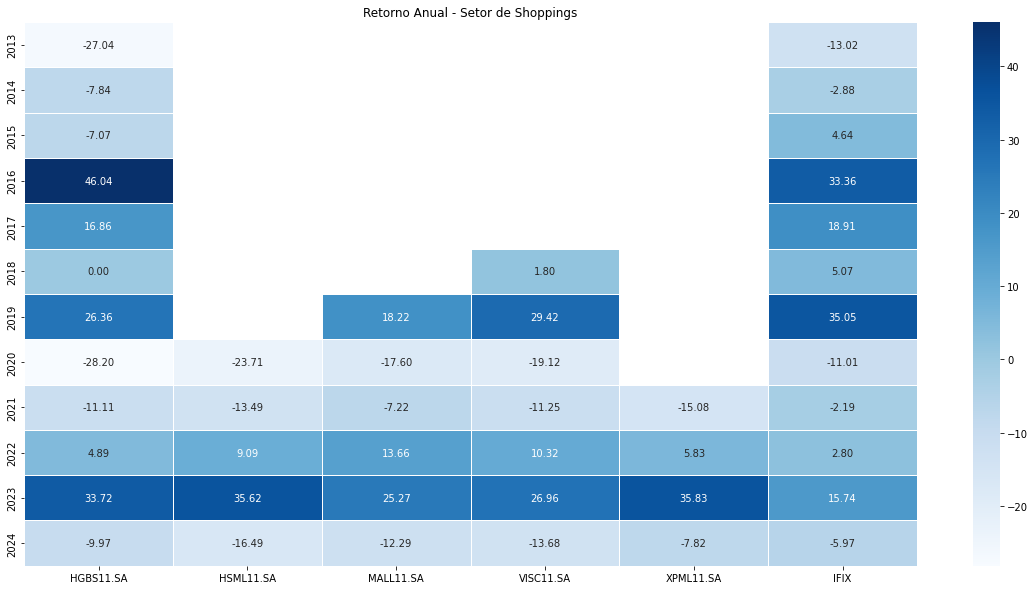

In [22]:
# Retorno anual
ret_anual_shopping = ret_anual(ticker=lst_ticker_fii_shopping, setor='Shoppings', df_benchmark=ifix_precos)

# Df para transformar em excel
df_ret_anual_shopping = ret_anual_shopping[0]

# Plot do retorno anual
ret_anual_shopping[1];

In [23]:
# Retorno acumulado
ret_acumulado_shopping = ret_acumulado(ticker=lst_ticker_fii_shopping, setor='Shoppings', df_benchmark=ifix_precos)

# Df para transformar em excel
df_ret_acumulado_shopping = ret_acumulado_shopping[0]

# Plot do retorno acumulado
ret_acumulado_shopping[1];

[*********************100%***********************]  5 of 5 completed


In [24]:
# Relação risco-retorno
plot_risk_return(ticker=lst_ticker_fii_shopping, setor='Shoppings')

[*********************100%***********************]  5 of 5 completed


**Portfólio dos Shoppings**

In [25]:
# Lendo o arquivo do portfólio - XPML11
df_portfolio_xpml = pd.read_excel(
    io='C://Users//vitor//projetos_python//python_b3//composicao-fundos-de-investimentos//fundo_imobiliario//portfolio_shoppings//xpml11_072025.xlsx',
)

df_portfolio_xpml

,Localização,Nome do Shopping,Endereço,Administrador,ABL Total,Qtde. lojas,Participação,Inauguração
0,"São Paulo, SP",Shopping Cidade Jardim,"Av. Magalhães de Castro, 12.000",JHSF,47080,177,0.1699,2008
1,"São Paulo, SP",Shopping Cidade São Paulo,"Av. Paulista, 1.230",SYN,16906,147,0.4000,2015
2,"São Paulo, SP",Tietê Plaza Shopping,"Av. Raimundo Pereira de Magalhães, 1465",SYN,37000,201,0.9000,2013
3,"São Paulo, SP",Shops Jardins,"Rua Haddock Lobo, 1.625",JHSF,4499,99,0.3000,2020
4,"São Paulo, SP",Plaza Sul Shopping,"Praça Leonor Kaupa, 100",Allos,24039,207,0.2500,1994
5,"São Paulo, SP",Partage Santana Shopping,"Rua Conselheiro Moreira de Barros, 2.780",Partage,26565,164,0.1500,2007
6,"São Paulo, SP",Shopping D,"Av. Cruzeiro do Sul, 1100",SYN,29787,152,0.2300,1994
7,"São Paulo, SP",FL Shops,"Rua Leopoldo Couto de Magalhães, 912",JHSF,0,0,0.0000,2026
8,"São Paulo, SP",Shopping Pátio Higienópolis,"Av. Higienópolis, 618",Iguatemi,34992,260,0.1004,1999
9,"São Roque, SP",Catarina Fashion Outlet,"Rodovia Castello Branco, km 60",JHSF,50835,265,0.3999,2014


In [26]:
# Lendo o arquivo do portfólio - VISC11
df_portfolio_visc = pd.read_excel(
    io='C://Users//vitor//projetos_python//python_b3//composicao-fundos-de-investimentos//fundo_imobiliario//portfolio_shoppings//visc11_072025.xlsx',
)

df_portfolio_visc

,Shopping,Localização,Adm,ABL Total (m²),Inauguração,Stake VISC (%),NOI VISC (%)
0,Prudenshopping,"Pres. Prudente, SP",Argo,31108,1990,1.00,0.13
1,Porto Velho Shopping,"Porto Velho, RO",Ancar Ivanhoé,44824,2008,0.49,0.09
2,Campinas Shopping,"Campinas, SP",Argo,36165,1994,0.55,0.08
3,Shopping Praia da Costa,"Vila Velha, ES",Soul Malls,39765,2002,0.99,0.07
4,Shopping Granja Vianna,"Cotia, SP",Alqia,30377,2010,0.49,0.07
5,Pantanal Shopping,"Cuiabá, MT",Ancar Ivanhoé,45222,2004,0.23,0.06
6,North Shopping Maracanaú,"Maracanaú, CE",Ancar Ivanhoé,20002,2003,1.00,0.06
7,Shopping Estação,"Curitiba, PR",Tacla,49869,1997,0.35,0.05
8,RibeirãoShopping,"Ribeirão Preto, SP",Multiplan S.A.,74988,1981,0.13,0.06
9,Natal Shopping,"Natal, RN",Ancar Ivanhoé,28332,1992,0.30,0.04


In [27]:
# Lendo o arquivo do portfólio - HGBS11
df_portfolio_hgbs = pd.read_excel(
    io='C://Users//vitor//projetos_python//python_b3//composicao-fundos-de-investimentos//fundo_imobiliario//portfolio_shoppings//hgbs11_072025.xlsx',
    sheet_name='Portfólio',
    header=8
)

# Removendo as colunas 'Unnamed: 0' e 'Unnamed: 2'
df_portfolio_hgbs = df_portfolio_hgbs.drop(columns='Unnamed: 0')

# Removendo os NaN para retornar apenas os shoppings
df_portfolio_hgbs = df_portfolio_hgbs.dropna()

df_portfolio_hgbs

,Portfólio Atual,Veículo,ABL Total,Participação HGBS,ABL Própria,Cidade,Administrador
0,Shopping Jardim Sul,Imóvel,28721.42,0.9,25849.278,São Paulo - SP,ALLOS
1,Shopping Center Penha,Imóvel,29778.51,0.875628,26074.897154,São Paulo - SP,AD Shopping
2,Shopping West Plaza,Imóvel + FII,35803.93,0.897155,32121.679409,São Paulo - SP,Soul Malls
3,Parque D. Pedro Shopping,FII,126322.64,0.076879,9711.577454,Campinas - SP,ALLOS
4,Mooca Plaza Shopping,Imóvel,42066.51,0.2,8413.302,São Paulo - SP,ALLOS
5,Capim Dourado Shopping,Imóvel,38730.8,0.6,23238.48,Palmas - TO,Soul Malls
6,Tivoli Shopping Center,Imóvel,25779,0.59,15209.61,Santa Bárbara D'Oeste - SP,AD Shopping
7,São Bernardo Plaza Shopping,Imóvel,42942.62,0.35,15029.917,São Bernardo do Campo - SP,ALLOS
8,Boulevard Shopping Bauru,Imóvel,34549.88,0.65,22457.422,Bauru - SP,ALLOS
9,Shopping Villa Lobos,Imóvel,28393.66,0.15,4259.049,São Paulo - SP,ALLOS


In [28]:
# Lendo o arquivo do portfólio - HSML11
df_portfolio_hsml = pd.read_excel(
    io='C://Users//vitor//projetos_python//python_b3//composicao-fundos-de-investimentos//fundo_imobiliario//portfolio_shoppings//hsml11_072025.xlsx',
)

df_portfolio_hsml

,Shopping,ABL Total,Participação,ABL Própria,Ocupação,Nº Lojas,Nº Vagas Estacionamento,Abertura
0,Shopping Pátio Maceió,43983,0.700,30788,0.987,143,2058,Novembro 2009
1,Shopping Granja Vianna,30377,0.510,15492,0.958,159,1300,Novembro 2010
2,Super Shopping Osasco,17984,0.588,10583,0.971,131,2800,Outubro 2005
3,Via Verde Shopping,28576,0.967,27623,0.976,100,1200,Novembro 2011
4,Shopping Metrô Tucuruvi²,32998,1.000,32998,0.929,221,2188,Abril 2013
5,Shopping Paralela³,57800,0.522,38600,0.988,258,2150,Abril 2009
6,Shopping Uberaba⁴,31575,0.750,23681,0.955,188,1190,Abril 1999


In [29]:
# Lendo o arquivo do portfólio - MALL11
df_portfolio_mall = pd.read_excel(
    io='C://Users//vitor//projetos_python//python_b3//composicao-fundos-de-investimentos//fundo_imobiliario//portfolio_shoppings//mall11_052025.xlsx',
)

df_portfolio_mall

,Shopping,Localização,Administração,Participação,Valor de Aquisição,Data do Investimento,ABL Total (m²),ABL Próprio (m²),% Remessa ou Distribuição,% PL
0,Maceió Shopping,"Maceió, AL",Proshopping,52.85,170150000,dez/17,32896,17385,0.15,0.15
1,Shopping Tacaruna,"Recife, PE",Tmall,6.67,42100000,set/19,49898,3329,0.02,0.03
2,Suzano Shopping,"Suzano, SP",HBR Realty,25.00,77500000,nov/19,24931,6234,0.04,0.05
3,Shopping Taboão,"Taboão da Serra, SP",Allos,8.00,55329032,dez/19,37217,2977,0.04,0.04
4,Boulevard Shopping,"Feira de Santana, BA",Allos,29.80,109007298,mar/21,23093,7283,0.08,0.07
5,Shopping Park Lagos,"Cabo Frio, RJ",Argo,40.00,92150000,dez/19,28327,11331,0.08,0.08
6,Shopping Park Sul,"Volta Redonda, RJ",Argo,40.00,111150000,dez/19,30367,12147,0.08,0.07
7,Madureira Shopping,"Rio de Janeiro, RJ",Ancar Ivanhoe,80.00,286176604,dez/21,36603,29282,0.15,0.16
8,Shopping Campinas,"Campinas, SP",Argo,20.00,82280000,dez/22,34174,6835,0.06,0.05
9,Boulevard Shopping Bauru,"Bauru, SP",Allos,35.00,81895379,dez/23,34550,12092,0.06,0.05


* ABL: é um indicador que mede a área total de um shopping center que está disponível para aluguel, exceto os quiosques.

In [30]:
# Transformando em um arquivo excel
with pd.ExcelWriter(f'C://Users//vitor//projetos_python//python_b3//composicao-fundos-de-investimentos//fundo_imobiliario//fii//fii_shoppings.xlsx') as writer:
    fii_xpml.to_excel(writer, sheet_name='XPML11')
    fii_visc.to_excel(writer, sheet_name='VISC11')
    fii_hgbs.to_excel(writer, sheet_name='HGBS11')
    fii_hsml.to_excel(writer, sheet_name='HSML11')
    fii_mall.to_excel(writer, sheet_name='MALL11')
    df_shoppings_dy.to_excel(writer, sheet_name='DIVIDEND_YIELD')
    df_shoppings_dy_accum.to_excel(writer, sheet_name='DIVIDEND_YIELD_ACUM')
    df_vol_drawdown_shopping.to_excel(writer, sheet_name='VOLATILIDADE_DRAWDOWN')
    df_ret_anual_shopping.to_excel(writer, sheet_name='RET_ANUAL')
    df_ret_acumulado_shopping.to_excel(writer, sheet_name='RET_ACUM')

**Indicador P/VP das ações de shoppings**
* Atualizar o 'dict_acoes_shoppings' para calcular o P/VP das empresas de shoppings;
---
* Quando o tipo da contabilidade adotada pelo shopping é:
    * **mercado**: o valor do 'propriedades_investimento' e 'valor_justo' são iguais;
        * Esse valor é encontrado no balanço patrimonal na parte do ativo é o item 'Propriedades para Investimento'.
    * **custo**: o valor do 'propriedades_investimento' e 'valor_justo' são diferentes.
        * O valor do 'propriedades_investimento' é encontrado no balanço patrimonal na parte do ativo é o item 'Propriedades para Investimento';
        * O valor do 'valor_justo' é encontrado na nota explicativa "propriedades para investimento".


In [31]:
# Ações de shoppings
lst_acoes_shoppings = ['ALOS3.SA', 'IGTI11.SA', 'MULT3.SA']

# Dados do 1T2024
dict_acoes_shoppings_1T24 = {
    'tipo_contabilidade': [
        'mercado',  # ALOS3 
        'custo',    # IGTI11
        'custo'     # MULT3
    ], 

    'num_acoes':[
        573936909,  # ALOS3 
        1233106910, # IGTI11
        600760875   # MULT3
    ],

    'propriedades_investimento':[
        21363200000,  # ALOS3 
        5066710000,   # IGTI11
        83183552000   # MULT3
    ],

    'valor_justo':[
        21363200000,  # ALOS3 
        14069612000,  # IGTI11
        29200692000   # MULT3
    ],

    'pl_contabil':[
        15006995000,  # ALOS3 
        4234679000,   # IGTI11
        7087747000    # MULT3
    ],

    'abl_propria':[
        1328809,  # ALOS3  
        491270,   # IGTI11
        713765    # MULT3
    ],

    'divida_liquida':[
        3526530000,  # ALOS3  
        1735990000,  # IGTI11
        2042648000   # MULT3
    ]
}

# Dados do 2T2024
dict_acoes_shoppings_2T24 = {
    'tipo_contabilidade': [
        'mercado',  # ALOS3 
        'custo',    # IGTI11
        'custo'     # MULT3
    ], 

    'num_acoes':[
        542936909,  # ALOS3 
        1217931130, # IGTI11
        600760875   # MULT3
    ],

    'propriedades_investimento':[
        20569241000,  # ALOS3 
        4987082000,   # IGTI11
        8553030000    # MULT3
    ],

    'valor_justo':[
        20569241000,  # ALOS3  
        14069612000,  # IGTI11
        30404491000   # MULT3
    ],

    'pl_contabil':[
        14888005000,  # ALOS3  
        4159817000,   # IGTI11
        7164748000    # MULT3
    ],

    'abl_propria':[
        1276678,  # ALOS3 
        491431,   # IGTI11
        758820    # MULT3
    ],

    'divida_liquida':[
        3003939000,  # ALOS3 
        1741906000,  # IGTI11
        2193197000   # MULT3
    ]
}

# Dados do 3T2024
dict_acoes_shoppings_3T24 = {
    'tipo_contabilidade': [
        'mercado', # ALOS3 
        'custo',   # IGTI11
        'custo'    # MULT3
    ], 

    'num_acoes':[
        542936909,  # ALOS3 
        1217931130, # IGTI11
        578163701   # MULT3
    ],

    'propriedades_investimento':[
        20556395000, # ALOS3 
        5452522000,  # IGTI11
        8686208000   # MULT3
    ],

    'valor_justo':[
        20556395000, # ALOS3 
        13827886000, # IGTI11
        30834077000  # MULT3
    ],

    'pl_contabil':[
        14710918000, # ALOS3  
        4263948000, # IGTI11
        7340951000  # MULT3
    ],

    'abl_propria':[
        1291465, # ALOS3   
        471897, # IGTI11 
        758744  # MULT3
    ],
    
    'divida_liquida':[
        3290524000, # ALOS3    
        1621387000, # IGTI11 
        2216800000  # MULT3
    ]
}

# Dados do DFP2024
dict_acoes_shoppings_4T24 = {
    'tipo_contabilidade': [
        'mercado', # ALOS3 
        'custo',   # IGTI11
        'custo'    # MULT3
    ], 

    'num_acoes':[
        542936909,  # ALOS3 
        1217931130, # IGTI11
        519163701   # MULT3
    ],

    'propriedades_investimento':[
        20700140000, # ALOS3 
        5520922000,  # IGTI11
        8909922000   # MULT3
    ],

    'valor_justo':[
        20700140000, # ALOS3 
        15631045000, # IGTI11
        30093435000  # MULT3
    ],

    'pl_contabil':[
        14134520000, # ALOS3  
        4310020000, # IGTI11
        5645769000  # MULT3
    ],

    'abl_propria':[
        1287355, # ALOS3   
        480968, # IGTI11 
        765102  # MULT3
    ],

    'divida_liquida':[
        3671487000, # ALOS3    
        1614844000, # IGTI11 
        4274600000  # MULT3
    ]
}

# Dados do 1T2025
dict_acoes_shoppings_1T25 = {
    'tipo_contabilidade': [
        'mercado',  # ALOS3 
        'custo',    # IGTI11
        'custo'     # MULT3
    ], 

    'num_acoes':[
        542_936_909,  # ALOS3 
        1_206_361_185, # IGTI11
        513_163_701   # MULT3
    ],

    'propriedades_investimento':[
        20_253_531_000,  # ALOS3 
        5_543_287_000,   # IGTI11
        8_989_257_000   # MULT3
    ],

    'valor_justo':[
        20_253_531_000,  # ALOS3 
        15_631_045_000,  # IGTI11
        31_355_333_000   # MULT3
    ],

    'pl_contabil':[
        12_198_264_000,  # ALOS3 
        4_409_459_000,   # IGTI11
        5_746_760_000    # MULT3
    ],

    'abl_propria':[
        1_254_323,  # ALOS3  
        479_246,   # IGTI11
        713_765    # MULT3
    ],

    'divida_liquida':[
        3_516_384_000,  # ALOS3  
        1_840_418_000,  # IGTI11
        4_231_300_000   # MULT3
    ]
}

# Dados do 2T2025
dict_acoes_shoppings_2T25 = {
    'tipo_contabilidade': [
        'mercado',  # ALOS3 
        'custo',    # IGTI11
        'custo'     # MULT3
    ], 

    'num_acoes':[
        542_936_909,  # ALOS3 
        1_206_361_185, # IGTI11
        513_163_701   # MULT3
    ],

    'propriedades_investimento':[
        20_235_584_000,  # ALOS3 
        6_051_359_000,   # IGTI11
        9_103_581_000   # MULT3
    ],

    'valor_justo':[
        20_235_584_000,  # ALOS3 
        15_762_431_000,  # IGTI11
        31_894_339_000   # MULT3
    ],

    'pl_contabil':[
        14_209_277_000,  # ALOS3 
        4_514_444_000,   # IGTI11
        5_905_361_000    # MULT3
    ],

    'abl_propria':[
        1_242_280,  # ALOS3  
        489_095,   # IGTI11
        765_466    # MULT3
    ],

    'divida_liquida':[
        3_418_573_000,  # ALOS3  
        2_381_817_000,  # IGTI11
        4_382_100_000   # MULT3
    ]
}

# 1T2024
df_acoes_shoppings_1T24 = indicadores_acoes_shoppings(
    ano='2024', 
    mes='03', 
    dict_shoppings=dict_acoes_shoppings_1T24, 
    ticker=lst_acoes_shoppings, 
    vm_igti=vm_igti(ano='2024', mes='03', num_on=797612750, num_pn=435494160)
)

# 2T2024
df_acoes_shoppings_2T24 = indicadores_acoes_shoppings(
    ano='2024', 
    mes='06', 
    dict_shoppings=dict_acoes_shoppings_2T24, 
    ticker=lst_acoes_shoppings, 
    vm_igti=vm_igti(ano='2024', mes='06', num_on=774849080, num_pn=443082050)
)

# 3T2024
df_acoes_shoppings_3T24 = indicadores_acoes_shoppings(
    ano='2024', 
    mes='09', 
    dict_shoppings=dict_acoes_shoppings_3T24, 
    ticker=lst_acoes_shoppings, 
    vm_igti=vm_igti(ano='2024', mes='09', num_on=774849080, num_pn=443082050)
)

# 4T2024
df_acoes_shoppings_4T24 = indicadores_acoes_shoppings(
    ano='2024', 
    mes='12', 
    dict_shoppings=dict_acoes_shoppings_4T24, 
    ticker=lst_acoes_shoppings, 
    vm_igti=vm_igti(ano='2024', mes='12', num_on=774849080, num_pn=443082050)
)

# 1T2025
df_acoes_shoppings_1T25 = indicadores_acoes_shoppings(
    ano='2025', 
    mes='03', 
    dict_shoppings=dict_acoes_shoppings_1T25, 
    ticker=lst_acoes_shoppings, 
    vm_igti=vm_igti(ano='2025', mes='03', num_on=770992429, num_pn=435368756)
)

# 2T2025
df_acoes_shoppings_2T25 = indicadores_acoes_shoppings(
    ano='2025', 
    mes='06', 
    dict_shoppings=dict_acoes_shoppings_2T25, 
    ticker=lst_acoes_shoppings, 
    vm_igti=vm_igti(ano='2025', mes='06', num_on=770992429, num_pn=435368756)
)

[*********************100%***********************]  2 of 2 completed
[*********************100%***********************]  3 of 3 completed
[*********************100%***********************]  2 of 2 completed
[*********************100%***********************]  3 of 3 completed
[*********************100%***********************]  2 of 2 completed
[*********************100%***********************]  3 of 3 completed
[*********************100%***********************]  2 of 2 completed
[*********************100%***********************]  3 of 3 completed
[*********************100%***********************]  2 of 2 completed
[*********************100%***********************]  3 of 3 completed
[*********************100%***********************]  2 of 2 completed
[*********************100%***********************]  3 of 3 completed


In [32]:
# Df do valor de mercado
df_shopping_valor_mercado = pd.concat([
    df_acoes_shoppings_1T24['valor_mercado'],
    df_acoes_shoppings_2T24['valor_mercado'],
    df_acoes_shoppings_3T24['valor_mercado'],
    df_acoes_shoppings_4T24['valor_mercado'],
    df_acoes_shoppings_1T25['valor_mercado'],
], axis=1)

# Renomeando as colunas 
df_shopping_valor_mercado.columns = [
    '1T24', '2T24', '3T24', '4T24',
    '1T25'
]

# Transpondo o df
df_shopping_valor_mercado = df_shopping_valor_mercado.T

# Plotando o valor de mercado
fig = go.Figure()

for idx, col in enumerate(df_shopping_valor_mercado.columns):
    fig.add_trace(go.Bar(
        x=df_shopping_valor_mercado.index,
        y=df_shopping_valor_mercado[col],
        name=col
    ))

fig.update_layout(
    title_text='Valor de Mercado - Shoppings',
    template='seaborn'
)

fig.show()

In [33]:
# Df do valor justo das propriedades para investimento
df_shopping_valor_justo = pd.concat([
    df_acoes_shoppings_1T24['valor_justo'],
    df_acoes_shoppings_2T24['valor_justo'],
    df_acoes_shoppings_3T24['valor_justo'],
    df_acoes_shoppings_4T24['valor_justo'],
    df_acoes_shoppings_1T25['valor_justo'],
], axis=1)

# Renomeando as colunas 
df_shopping_valor_justo.columns = [
    '1T24', '2T24', '3T24', '4T2024',
    '1T25'
]

# Transpondo o df
df_shopping_valor_justo = df_shopping_valor_justo.T

# Plotando o valor justo
fig = go.Figure()

for idx, col in enumerate(df_shopping_valor_justo.columns):
    fig.add_trace(go.Bar(
        x=df_shopping_valor_justo.index,
        y=df_shopping_valor_justo[col],
        name=col
    ))

fig.update_layout(
    title_text='Valor Justo - Shoppings',
    template='seaborn'
)

fig.show()

In [35]:
# Df do P/VP dos shoppings
df_shopping_p_vp = pd.concat([
    round(df_acoes_shoppings_1T24['p/vp'], 2),
    round(df_acoes_shoppings_2T24['p/vp'], 2),
    round(df_acoes_shoppings_3T24['p/vp'], 2),
    round(df_acoes_shoppings_4T24['p/vp'], 2),
    round(df_acoes_shoppings_1T25['p/vp'], 2),
], axis=1)

# Renomeando as colunas 
df_shopping_p_vp.columns = [
    '1T24', '2T24', '3T24', '4T24',
    '1T25'
]

# Transpondo o df
df_shopping_p_vp = df_shopping_p_vp.T

# Plotando o P/VP dos shoppings
fig = go.Figure()

for idx, col in enumerate(df_shopping_p_vp.columns):
    fig.add_trace(go.Scatter(
        x=df_shopping_p_vp.index,
        y=df_shopping_p_vp[col],
        name=col
    ))

fig.add_hline(
    y=0,  
    line_dash='dash', 
    line_color='red', 
    line_width=2  
)

fig.update_layout(
    title_text='Indicador P/VP - Shoppings',
    template='seaborn'
)

fig.show()

In [36]:
# Df do EV/ABL dos shoppings
df_shopping_ev_abl = pd.concat([
    round(df_acoes_shoppings_1T24['ev/abl'], 2),
    round(df_acoes_shoppings_2T24['ev/abl'], 2),
    round(df_acoes_shoppings_3T24['ev/abl'], 2),
    round(df_acoes_shoppings_4T24['ev/abl'], 2),
    round(df_acoes_shoppings_1T25['ev/abl'], 2),
], axis=1)

# Renomeando as colunas 
df_shopping_ev_abl.columns = [
    '1T24', '2T24', '3T24', '4T24',
    '1T25'
]

# Transpondo o df
df_shopping_ev_abl = df_shopping_ev_abl.T

# Plotando o EV/ABL dos shoppings
fig = go.Figure()

for idx, col in enumerate(df_shopping_ev_abl.columns):
    fig.add_trace(go.Scatter(
        x=df_shopping_ev_abl.index,
        y=df_shopping_ev_abl[col],
        name=col
    ))

fig.update_layout(
    title_text='Indicador EV/ABL - Shoppings',
    template='seaborn'
)

fig.show()

### FII - Logístico/Industrial/Galpões

In [37]:
# Lista dos tickers
lst_ticker_fii_logistica = [
    'HGLG11.SA', 
    'BTLG11.SA',
    'XPLG11.SA',
    'LVBI11.SA',
    'BRCO11.SA',
    'TRBL11.SA',
    'KNRI11.SA'
]

# Carregando todos os dados dos FIIs
fii_hglg = fii_cnpj(df=df_ifix, cnpj='11.728.688/0001-47', ticker='HGLG11.SA')
fii_btlg = fii_cnpj(df=df_ifix, cnpj='11.839.593/0001-09', ticker='BTLG11.SA')
fii_xplg = fii_cnpj(df=df_ifix, cnpj='26.502.794/0001-85', ticker='XPLG11.SA')
fii_lvbi = fii_cnpj(df=df_ifix, cnpj='30.629.603/0001-18', ticker='LVBI11.SA')
fii_brco = fii_cnpj(df=df_ifix, cnpj='20.748.515/0001-81', ticker='BRCO11.SA')
fii_trbl = fii_cnpj(df=df_ifix, cnpj='16.671.412/0001-93', ticker='TRBL11.SA')
fii_knri = fii_cnpj(df=df_ifix, cnpj='12.005.956/0001-65', ticker='KNRI11.SA')

# Mesclando todos os últimos dados
fii_logistica = pd.concat([
    fii_hglg,
    fii_btlg,
    fii_xplg,
    fii_lvbi,
    fii_brco,
    fii_trbl,
    fii_knri
])

# Mostrando os dados do último mês divulgado
fii_logistica.loc[
    fii_logistica.index[-1],
    ['Ticker', 'Close', 'Grau_Alavancagem', 'P/VP', 'Percentual_Rentabilidade_Efetiva_Mes', 'Percentual_Dividend_Yield_Mes']
].sort_values('P/VP', ascending=False)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


,Ticker,Close,Grau_Alavancagem,P/VP,Percentual_Rentabilidade_Efetiva_Mes,Percentual_Dividend_Yield_Mes
Data_Referencia,,,,,,
2025-06-01,HGLG11,157.002258,11.509833,0.96,0.74,0.68
2025-06-01,BTLG11,99.166405,15.153814,0.95,1.38,1.28
2025-06-01,XPLG11,97.852486,5.757804,0.92,0.22,0.76
2025-06-01,BRCO11,108.286476,1.203547,0.92,0.60,0.89
2025-06-01,KNRI11,142.292191,5.976455,0.87,1.36,0.62
2025-06-01,LVBI11,101.350883,0.047878,0.86,-5.12,0.59
2025-06-01,TRBL11,58.917995,21.950925,0.68,0.35,0.64


In [38]:
# Histórico do indicador P/VP dos FIIs 
historico_p_vp_logistica =plot_historico_p_vp(df=fii_logistica, nome_segmento='Logística')
historico_p_vp_logistica

In [39]:
fii_logistica.loc[
    fii_logistica['Ticker'] == 'HGLG11', 
    ['CNPJ_Fundo', 'Ticker', 'Close', 'Divida_Total', 'Grau_Alavancagem', 'P/VP', 'Percentual_Rentabilidade_Efetiva_Mes', 'Percentual_Dividend_Yield_Mes']
]

,CNPJ_Fundo,Ticker,Close,Divida_Total,Grau_Alavancagem,P/VP,Percentual_Rentabilidade_Efetiva_Mes,Percentual_Dividend_Yield_Mes
Data_Referencia,,,,,,,,
2022-01-01,11.728.688/0001-47,HGLG11,123.765015,0.000000e+00,0.000000,0.84,0.22,0.74
2022-02-01,11.728.688/0001-47,HGLG11,121.188881,0.000000e+00,0.000000,0.82,0.58,0.75
2022-03-01,11.728.688/0001-47,HGLG11,118.648956,1.671078e+08,4.941414,0.80,1.92,0.75
2022-04-01,11.728.688/0001-47,HGLG11,120.494102,1.674785e+08,4.959268,0.81,0.60,0.74
2022-05-01,11.728.688/0001-47,HGLG11,122.106407,1.634206e+08,4.405733,0.82,1.21,0.74
2022-06-01,11.728.688/0001-47,HGLG11,122.419113,1.684276e+08,4.560510,0.84,0.40,2.21
2022-07-01,11.728.688/0001-47,HGLG11,128.132828,1.680602e+08,4.631506,0.88,0.53,0.75
2022-08-01,11.728.688/0001-47,HGLG11,131.918564,1.676095e+08,4.582360,0.89,1.61,0.75
2022-09-01,11.728.688/0001-47,HGLG11,132.003220,3.773414e+08,9.778812,0.90,0.50,0.75


In [40]:
fii_logistica.loc[
    fii_logistica['Ticker'] == 'BTLG11', 
    ['CNPJ_Fundo', 'Ticker', 'Close', 'Divida_Total', 'Grau_Alavancagem', 'P/VP', 'Percentual_Rentabilidade_Efetiva_Mes', 'Percentual_Dividend_Yield_Mes']
]

,CNPJ_Fundo,Ticker,Close,Divida_Total,Grau_Alavancagem,P/VP,Percentual_Rentabilidade_Efetiva_Mes,Percentual_Dividend_Yield_Mes
Data_Referencia,,,,,,,,
2022-01-01,11.839.593/0001-09,BTLG11,76.496208,3.232351e+08,17.469858,0.77,0.12,1.03
2022-02-01,11.839.593/0001-09,BTLG11,74.832489,3.237959e+08,17.530068,0.75,0.49,0.33
2022-03-01,11.839.593/0001-09,BTLG11,75.165382,3.119974e+08,16.705901,0.76,1.06,1.44
2022-04-01,11.839.593/0001-09,BTLG11,75.536606,2.899572e+08,14.680121,0.76,1.18,1.10
2022-05-01,11.839.593/0001-09,BTLG11,75.334633,2.913907e+08,14.824053,0.77,0.06,0.52
2022-06-01,11.839.593/0001-09,BTLG11,74.383835,2.919447e+08,14.858848,0.75,0.64,0.26
2022-07-01,11.839.593/0001-09,BTLG11,75.124069,2.384510e+08,12.481891,0.77,0.76,1.72
2022-08-01,11.839.593/0001-09,BTLG11,78.545464,2.388415e+08,12.542876,0.80,0.34,0.23
2022-09-01,11.839.593/0001-09,BTLG11,78.384766,2.386138e+08,11.233599,0.80,3.01,3.16


In [41]:
fii_logistica.loc[
    fii_logistica['Ticker'] == 'XPLG11', 
    ['CNPJ_Fundo', 'Ticker', 'Close', 'Divida_Total', 'Grau_Alavancagem', 'P/VP', 'Percentual_Rentabilidade_Efetiva_Mes', 'Percentual_Dividend_Yield_Mes']
]

,CNPJ_Fundo,Ticker,Close,Divida_Total,Grau_Alavancagem,P/VP,Percentual_Rentabilidade_Efetiva_Mes,Percentual_Dividend_Yield_Mes
Data_Referencia,,,,,,,,
2022-01-01,26.502.794/0001-85,XPLG11,73.375198,1.343430e+07,0.432840,0.67,-0.71,0.58
2022-02-01,26.502.794/0001-85,XPLG11,68.500366,9.025904e+06,0.291362,0.61,2.09,0.60
2022-03-01,26.502.794/0001-85,XPLG11,72.735123,5.845072e+06,0.186806,0.64,2.35,0.59
2022-04-01,26.502.794/0001-85,XPLG11,73.394501,5.845072e+06,0.187288,0.65,0.40,0.58
2022-05-01,26.502.794/0001-85,XPLG11,72.013962,5.845072e+06,0.186566,0.63,1.04,0.60
2022-06-01,26.502.794/0001-85,XPLG11,71.170609,5.845072e+06,0.186802,0.63,0.54,0.62
2022-07-01,26.502.794/0001-85,XPLG11,74.699646,5.845072e+06,0.186699,0.66,0.67,0.63
2022-08-01,26.502.794/0001-85,XPLG11,83.445213,5.267682e+06,0.168095,0.73,0.81,0.63
2022-09-01,26.502.794/0001-85,XPLG11,85.300766,1.214379e+08,3.731212,0.75,0.92,0.65


In [42]:
fii_logistica.loc[
    fii_logistica['Ticker'] == 'LVBI11', 
    ['CNPJ_Fundo', 'Ticker', 'Close', 'Divida_Total', 'Grau_Alavancagem', 'P/VP', 'Percentual_Rentabilidade_Efetiva_Mes', 'Percentual_Dividend_Yield_Mes']
]

,CNPJ_Fundo,Ticker,Close,Divida_Total,Grau_Alavancagem,P/VP,Percentual_Rentabilidade_Efetiva_Mes,Percentual_Dividend_Yield_Mes
Data_Referencia,,,,,,,,
2022-01-01,30.629.603/0001-18,LVBI11,73.599205,3.002099e+08,17.960501,0.64,0.59,0.62
2022-02-01,30.629.603/0001-18,LVBI11,72.861572,3.000787e+08,17.951777,0.63,0.64,0.63
2022-03-01,30.629.603/0001-18,LVBI11,73.886856,2.434830e+08,15.074775,0.64,0.63,0.72
2022-04-01,30.629.603/0001-18,LVBI11,73.547546,2.667085e+08,16.283163,0.64,0.60,0.60
2022-05-01,30.629.603/0001-18,LVBI11,75.947052,2.696083e+08,16.429160,0.66,0.67,0.66
2022-06-01,30.629.603/0001-18,LVBI11,73.708145,2.739569e+08,16.558724,0.64,1.42,0.69
2022-07-01,30.629.603/0001-18,LVBI11,75.404289,2.738590e+08,16.546369,0.65,0.68,0.69
2022-08-01,30.629.603/0001-18,LVBI11,86.192795,2.710232e+08,16.396667,0.75,0.69,0.67
2022-09-01,30.629.603/0001-18,LVBI11,88.723648,2.670549e+08,16.195549,0.77,0.64,0.68


In [43]:
fii_logistica.loc[
    fii_logistica['Ticker'] == 'BRCO11', 
    ['CNPJ_Fundo', 'Ticker', 'Close', 'Divida_Total', 'Grau_Alavancagem', 'P/VP', 'Percentual_Rentabilidade_Efetiva_Mes', 'Percentual_Dividend_Yield_Mes']
]

,CNPJ_Fundo,Ticker,Close,Divida_Total,Grau_Alavancagem,P/VP,Percentual_Rentabilidade_Efetiva_Mes,Percentual_Dividend_Yield_Mes
Data_Referencia,,,,,,,,
2022-01-01,20.748.515/0001-81,BRCO11,71.993515,2.554262e+07,1.424694,0.61,0.56,0.53
2022-02-01,20.748.515/0001-81,BRCO11,73.447807,2.539281e+07,1.416089,0.62,0.59,0.53
2022-03-01,20.748.515/0001-81,BRCO11,72.896935,2.528229e+07,1.408319,0.61,0.63,0.53
2022-04-01,20.748.515/0001-81,BRCO11,74.929512,2.512516e+07,1.397847,0.63,0.55,0.53
2022-05-01,20.748.515/0001-81,BRCO11,74.274864,2.492436e+07,1.387138,0.62,0.58,0.55
2022-06-01,20.748.515/0001-81,BRCO11,73.773117,2.478655e+07,1.378010,0.62,0.60,0.65
2022-07-01,20.748.515/0001-81,BRCO11,75.448082,2.464659e+07,1.371300,0.63,0.61,0.55
2022-08-01,20.748.515/0001-81,BRCO11,82.784615,2.452539e+07,1.363242,0.70,0.60,0.59
2022-09-01,20.748.515/0001-81,BRCO11,82.937370,2.440695e+07,1.355862,0.70,0.63,0.59


In [44]:
fii_logistica.loc[
    fii_logistica['Ticker'] == 'TRBL11', 
    ['CNPJ_Fundo', 'Ticker', 'Close', 'Divida_Total', 'Grau_Alavancagem', 'P/VP', 'Percentual_Rentabilidade_Efetiva_Mes', 'Percentual_Dividend_Yield_Mes']
]

,CNPJ_Fundo,Ticker,Close,Divida_Total,Grau_Alavancagem,P/VP,Percentual_Rentabilidade_Efetiva_Mes,Percentual_Dividend_Yield_Mes
Data_Referencia,,,,,,,,
2023-06-01,16.671.412/0001-93,TRBL11,78.063332,2.249756e+08,26.639786,0.81,0.54,0.86
2023-07-01,16.671.412/0001-93,TRBL11,80.344269,2.253415e+08,26.724260,0.84,0.60,0.78
2023-08-01,16.671.412/0001-93,TRBL11,82.773491,2.255834e+08,26.760633,0.87,0.72,0.75
2023-09-01,16.671.412/0001-93,TRBL11,81.620209,2.259365e+08,26.838963,0.86,0.52,0.75
2023-10-01,16.671.412/0001-93,TRBL11,81.224777,2.264809e+08,26.903660,0.85,0.68,0.75
2023-11-01,16.671.412/0001-93,TRBL11,80.668800,2.270239e+08,26.717277,0.85,0.91,0.75
2023-12-01,16.671.412/0001-93,TRBL11,81.680397,2.275111e+08,25.864344,0.83,3.71,0.76
2024-01-01,16.671.412/0001-93,TRBL11,84.106049,2.282474e+08,24.545700,0.80,8.71,0.87
2024-02-01,16.671.412/0001-93,TRBL11,85.048965,2.290439e+08,24.739532,0.82,-0.96,0.80


In [45]:
fii_logistica.loc[
    fii_logistica['Ticker'] == 'KNRI11', 
    ['CNPJ_Fundo', 'Ticker', 'Close', 'Divida_Total', 'Grau_Alavancagem', 'P/VP', 'Percentual_Rentabilidade_Efetiva_Mes', 'Percentual_Dividend_Yield_Mes']
]

,CNPJ_Fundo,Ticker,Close,Divida_Total,Grau_Alavancagem,P/VP,Percentual_Rentabilidade_Efetiva_Mes,Percentual_Dividend_Yield_Mes
Data_Referencia,,,,,,,,
2022-01-01,12.005.956/0001-65,KNRI11,101.777718,0.000000e+00,0.000000,0.65,0.37,0.51
2022-02-01,12.005.956/0001-65,KNRI11,101.282181,0.000000e+00,0.000000,0.64,0.27,0.51
2022-03-01,12.005.956/0001-65,KNRI11,104.598541,0.000000e+00,0.000000,0.67,0.56,0.52
2022-04-01,12.005.956/0001-65,KNRI11,104.987656,0.000000e+00,0.000000,0.67,0.47,0.53
2022-05-01,12.005.956/0001-65,KNRI11,102.315811,0.000000e+00,0.000000,0.65,0.52,0.53
2022-06-01,12.005.956/0001-65,KNRI11,102.096283,0.000000e+00,0.000000,0.64,2.22,0.53
2022-07-01,12.005.956/0001-65,KNRI11,106.751923,0.000000e+00,0.000000,0.67,0.58,0.57
2022-08-01,12.005.956/0001-65,KNRI11,121.091454,3.110010e+08,7.373303,0.76,0.63,0.57
2022-09-01,12.005.956/0001-65,KNRI11,120.922928,3.081480e+08,7.309759,0.76,0.70,0.57


In [46]:
# Volatilidade anual
vol_anual_logistica = vol_anual(ticker=lst_ticker_fii_logistica, ano='2024').sort_values(ascending=False)

# Plotando a volatilidade anual
fig = go.Figure()

fig.add_trace(go.Bar(
    x=vol_anual_logistica.index,
    y=vol_anual_logistica.values
))

fig.update_layout(
    title_text='Volatilidade Anual - FIIs de Logística',
    template='seaborn',
    showlegend=False   
)

fig.show()

[*********************100%***********************]  7 of 7 completed


In [47]:
# Drawdown
drawdown_logistica = drawdown(ticker=lst_ticker_fii_logistica).sort_values(ascending=False)

# Plotando o drawndown
fig = go.Figure()

fig.add_trace(go.Bar(
    x=drawdown_logistica.index,
    y=drawdown_logistica.values
))

fig.update_layout(
    title_text='Drawdown - FIIs Galpões Logísticos',
    template='seaborn',
    showlegend=False   
)

fig.show()

[*********************100%***********************]  7 of 7 completed


In [48]:
# Criando um df da volatilidade anual e o drawdown
df_vol_drawdown_logistica = pd.DataFrame([vol_anual_logistica, drawdown_logistica], index=['volatilidade_anual', 'drawndown']).T
df_vol_drawdown_logistica

,volatilidade_anual,drawndown
Ticker,,
TRBL11.SA,29.12,-42.47
LVBI11.SA,14.38,-21.15
BTLG11.SA,13.87,-14.23
XPLG11.SA,13.35,-16.22
BRCO11.SA,13.11,-19.54
KNRI11.SA,12.33,-20.21
HGLG11.SA,11.08,-10.96


In [49]:
# Dividend yield médio, máximo e mínimo dos FII 
df_logistica_dy = dy_fii(df=fii_logistica)

# Plotando o dividend yield médio, máximo e mínimo
fig = make_subplots(
    rows=3, 
    cols=1,
    subplot_titles=[
        'Dividend Yield Médio',
        'Dividend Yield Máximo',
        'Dividend Yield Mínimo'
    ],
    vertical_spacing=0.1
    )

fig.add_trace(go.Bar(
    x=df_logistica_dy.index,
    y=df_logistica_dy['dy_medio'],
    name='DY médio'
), row=1, col=1)

fig.add_trace(go.Bar(
    x=df_logistica_dy.index,
    y=df_logistica_dy['dy_max'],
     name='DY máximo'
), row=2, col=1)

fig.add_trace(go.Bar(
    x=df_logistica_dy.index,
    y=df_logistica_dy['dy_min'],
     name='DY mínimo'
), row=3, col=1)

fig.update_layout(
    title='Dividend yield dos FII de Logística',
    height=1200)

fig.show()

In [50]:
# DY acumulado dos últimos 12 meses
df_logistica_dy_accum = dy_fii_acumm_12m(df=fii_logistica)

# Plotando o DY acumulados dos últimos 12 meses
fig = go.Figure()

for empresa in df_logistica_dy_accum.columns:
    fig.add_trace(go.Scatter(
        x=df_logistica_dy_accum.index,
        y=df_logistica_dy_accum[empresa],
        name=empresa
    ))

fig.update_layout(title='Dividend yield acumulados dos últmos 12 meses - FII de Logística')

fig.show()

[*********************100%***********************]  7 of 7 completed


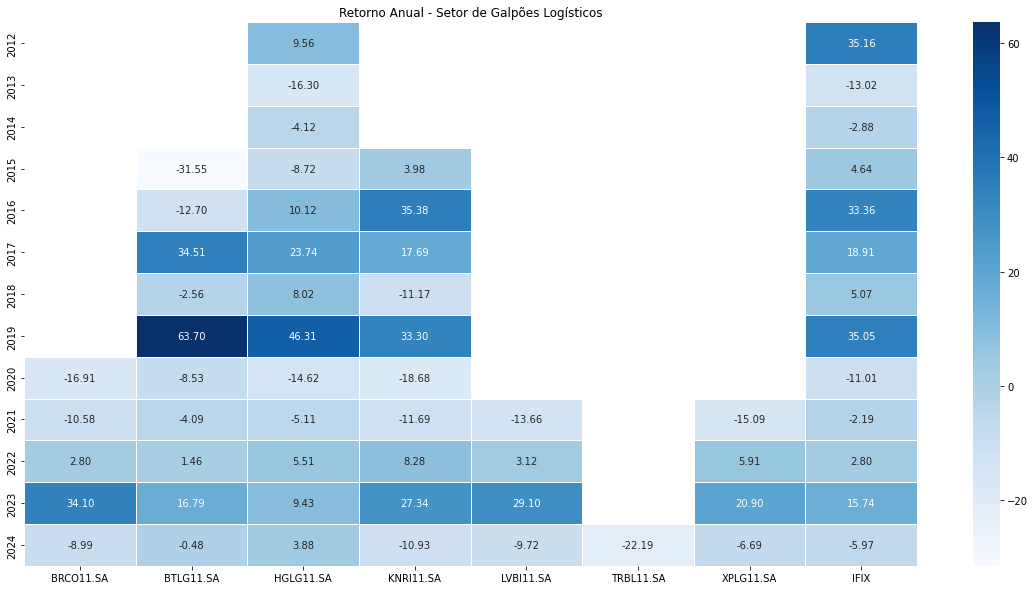

In [51]:
# Retorno anual
ret_anual_logistica = ret_anual(ticker=lst_ticker_fii_logistica, setor='Galpões Logísticos', df_benchmark=ifix_precos)

# Df para transformar em excel
df_ret_anual_logistica = ret_anual_logistica[0]

# Plot do retorno anual
ret_anual_logistica[1];

In [52]:
# Retorno acumulado
ret_acumulado_logistica = ret_acumulado(ticker=lst_ticker_fii_logistica, setor='Galpões Logísticos', df_benchmark=ifix_precos)

# Df para transformar em excel
df_ret_acumulado_logistica = ret_acumulado_logistica[0]

# Plot do retorno anual
ret_acumulado_logistica[1];

[*********************100%***********************]  7 of 7 completed


In [53]:
# Relação risco-retorno
plot_risk_return(ticker=lst_ticker_fii_logistica, setor='Galpões Logísticos')

[*********************100%***********************]  7 of 7 completed


In [54]:
# Transformando em um arquivo excel
with pd.ExcelWriter(f'C://Users//vitor//projetos_python//python_b3//composicao-fundos-de-investimentos//fundo_imobiliario//fii//fii_logistica.xlsx') as writer:
    fii_hglg.to_excel(writer, sheet_name='HGLG11')
    fii_btlg.to_excel(writer, sheet_name='BTLG11')
    fii_xplg.to_excel(writer, sheet_name='XPLG11')
    fii_lvbi.to_excel(writer, sheet_name='LVBI11')
    fii_brco.to_excel(writer, sheet_name='BRCO11')
    fii_trbl.to_excel(writer, sheet_name='TRBL11')
    fii_knri.to_excel(writer, sheet_name='KNRI11')
    df_logistica_dy.to_excel(writer, sheet_name='DIVIDEND_YIELD')
    df_logistica_dy_accum.to_excel(writer, sheet_name='DIVIDEND_YIELD_ACUM')
    df_vol_drawdown_logistica.to_excel(writer, sheet_name='VOLATILIDADE_DRAWDOWN')
    df_ret_anual_logistica.to_excel(writer, sheet_name='RET_ANUAL')
    df_ret_acumulado_logistica.to_excel(writer, sheet_name='RET_ACUM')

### FII - Lajes Corporativas

In [55]:
# Lista dos tickers
lst_ticker_fii_lajes = ['PVBI11.SA', 'HGPO11.SA', 'KORE11.SA']

# Carregando todos os dados dos FIIs
fii_pvbi = fii_cnpj(df=df_ifix, cnpj='35.652.102/0001-76', ticker='PVBI11.SA')
fii_hgpo = fii_cnpj(df=df_ifix, cnpj='11.260.134/0001-68', ticker='HGPO11.SA')
fii_kore = fii_cnpj(df=df_ifix, cnpj='52.219.978/0001-42', ticker='KORE11.SA')

# Mesclando todos os últimos dados
fii_lajes = pd.concat([
    fii_pvbi,
    fii_hgpo,
    fii_kore
])

# Mostrando os dados do último mês divulgado
fii_lajes.loc[
    fii_lajes.index[-1],
    ['Ticker', 'Close', 'Divida_Total', 'Grau_Alavancagem', 'P/VP', 'Percentual_Rentabilidade_Efetiva_Mes', 'Percentual_Dividend_Yield_Mes'] 
].sort_values('P/VP', ascending=False)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


,Ticker,Close,Divida_Total,Grau_Alavancagem,P/VP,Percentual_Rentabilidade_Efetiva_Mes,Percentual_Dividend_Yield_Mes
Data_Referencia,,,,,,,
2025-06-01,HGPO11,135.000000,0.0,0.0,0.96,1.00,0.00
2025-06-01,KORE11,80.745628,0.0,0.0,0.76,1.10,1.18
2025-06-01,PVBI11,75.171806,0.0,0.0,0.70,3.01,0.39


In [56]:
# Histórico do indicador P/VP dos FIIs 
historico_p_vp_lajes =plot_historico_p_vp(df=fii_lajes, nome_segmento='Lajes Corporativas')
historico_p_vp_lajes

In [57]:
fii_lajes.loc[
    fii_lajes['Ticker'] == 'PVBI11', 
    ['CNPJ_Fundo', 'Ticker', 'Close', 'Divida_Total', 'Grau_Alavancagem', 'P/VP', 'Percentual_Rentabilidade_Efetiva_Mes', 'Percentual_Dividend_Yield_Mes']
]

,CNPJ_Fundo,Ticker,Close,Divida_Total,Grau_Alavancagem,P/VP,Percentual_Rentabilidade_Efetiva_Mes,Percentual_Dividend_Yield_Mes
Data_Referencia,,,,,,,,
2022-01-01,35.652.102/0001-76,PVBI11,67.199432,2.178175e+08,1.774540e+01,0.68,0.49,0.54
2022-02-01,35.652.102/0001-76,PVBI11,67.550926,2.183518e+08,1.779015e+01,0.68,0.55,0.60
2022-03-01,35.652.102/0001-76,PVBI11,70.665466,2.193623e+08,1.786371e+01,0.71,0.46,0.56
2022-04-01,35.652.102/0001-76,PVBI11,73.350334,2.203017e+08,1.793694e+01,0.74,0.47,0.59
2022-05-01,35.652.102/0001-76,PVBI11,74.564552,2.406833e+08,1.930244e+01,0.75,0.40,0.58
2022-06-01,35.652.102/0001-76,PVBI11,71.871307,2.422239e+08,1.934203e+01,0.72,0.95,0.55
2022-07-01,35.652.102/0001-76,PVBI11,72.312462,2.427957e+08,1.939454e+01,0.73,0.46,0.59
2022-08-01,35.652.102/0001-76,PVBI11,78.185257,2.432713e+08,1.943102e+01,0.79,0.52,0.58
2022-09-01,35.652.102/0001-76,PVBI11,78.910591,2.479408e+08,1.972582e+01,0.80,0.59,0.57


In [58]:
fii_lajes.loc[
    fii_lajes['Ticker'] == 'HGPO11', 
    ['CNPJ_Fundo', 'Ticker', 'Close', 'Divida_Total', 'Grau_Alavancagem', 'P/VP', 'Percentual_Rentabilidade_Efetiva_Mes', 'Percentual_Dividend_Yield_Mes']
]

,CNPJ_Fundo,Ticker,Close,Divida_Total,Grau_Alavancagem,P/VP,Percentual_Rentabilidade_Efetiva_Mes,Percentual_Dividend_Yield_Mes
Data_Referencia,,,,,,,,
2022-01-01,11.260.134/0001-68,HGPO11,215.061630,0.0,0.0,0.80,0.53,0.50
2022-02-01,11.260.134/0001-68,HGPO11,220.896698,0.0,0.0,0.82,0.51,0.50
2022-03-01,11.260.134/0001-68,HGPO11,215.286728,0.0,0.0,0.80,0.56,0.50
2022-04-01,11.260.134/0001-68,HGPO11,217.197296,0.0,0.0,0.81,0.49,0.50
2022-05-01,11.260.134/0001-68,HGPO11,219.008286,0.0,0.0,0.82,0.51,0.50
2022-06-01,11.260.134/0001-68,HGPO11,219.965042,0.0,0.0,0.82,0.52,0.50
2022-07-01,11.260.134/0001-68,HGPO11,216.194427,0.0,0.0,0.81,0.53,0.56
2022-08-01,11.260.134/0001-68,HGPO11,225.133316,0.0,0.0,0.84,0.55,0.60
2022-09-01,11.260.134/0001-68,HGPO11,225.701874,0.0,0.0,0.84,0.54,0.60


In [59]:
fii_lajes.loc[
    fii_lajes['Ticker'] == 'KORE11', 
    ['CNPJ_Fundo', 'Ticker', 'Close', 'Divida_Total', 'Grau_Alavancagem', 'P/VP', 'Percentual_Rentabilidade_Efetiva_Mes', 'Percentual_Dividend_Yield_Mes']
]

,CNPJ_Fundo,Ticker,Close,Divida_Total,Grau_Alavancagem,P/VP,Percentual_Rentabilidade_Efetiva_Mes,Percentual_Dividend_Yield_Mes
Data_Referencia,,,,,,,,
2023-12-01,52.219.978/0001-42,KORE11,82.841774,0.0,0.0,0.83,0.00,0.00
2024-01-01,52.219.978/0001-42,KORE11,84.910706,0.0,0.0,0.84,2.09,1.25
2024-02-01,52.219.978/0001-42,KORE11,86.363098,0.0,0.0,0.86,1.34,1.24
2024-03-01,52.219.978/0001-42,KORE11,87.113411,0.0,0.0,0.86,1.22,1.24
2024-04-01,52.219.978/0001-42,KORE11,87.432930,0.0,0.0,0.87,1.15,1.24
2024-05-01,52.219.978/0001-42,KORE11,87.166298,0.0,0.0,0.87,1.22,1.24
2024-06-01,52.219.978/0001-42,KORE11,85.850044,0.0,0.0,0.81,6.48,1.24
2024-07-01,52.219.978/0001-42,KORE11,86.189278,0.0,0.0,0.81,1.21,1.18
2024-08-01,52.219.978/0001-42,KORE11,88.307983,0.0,0.0,0.83,1.14,1.18


In [60]:
# Volatilidade anual
vol_anual_lajes = vol_anual(ticker=lst_ticker_fii_lajes, ano='2024').sort_values(ascending=False)

# Plotando a volatilidade anual
fig = go.Figure()

fig.add_trace(go.Bar(
    x=vol_anual_lajes.index,
    y=vol_anual_lajes.values
))

fig.update_layout(
    title_text='Volatilidade Anual - FIIs Lajes Corporativas',
    template='seaborn',
    showlegend=False   
)

fig.show()

[*********************100%***********************]  3 of 3 completed


In [61]:
# Drawdown
drawdown_lajes = drawdown(ticker=lst_ticker_fii_lajes).sort_values(ascending=False)

# Plotando o drawndown
fig = go.Figure()

fig.add_trace(go.Bar(
    x=drawdown_lajes.index,
    y=drawdown_lajes.values
))

fig.update_layout(
    title_text='Drawdown - FIIs Lajes Corporativas',
    template='seaborn',
    showlegend=False   
)

fig.show()

[*********************100%***********************]  3 of 3 completed


In [62]:
# Criando um df da volatilidade anual e o drawdown
df_vol_drawdown_lajes = pd.DataFrame([vol_anual_lajes, drawdown_lajes], index=['volatilidade_anual', 'drawndown']).T
df_vol_drawdown_lajes

,volatilidade_anual,drawndown
Ticker,,
HGPO11.SA,96.45,-61.40
KORE11.SA,18.46,-27.57
PVBI11.SA,17.17,-29.69


In [63]:
# Dividend yield médio, máximo e mínimo dos FII 
df_lajes_dy = dy_fii(df=fii_lajes)

# Plotando o dividend yield médio, máximo e mínimo
fig = make_subplots(
    rows=3, 
    cols=1,
    subplot_titles=[
        'Dividend Yield Médio',
        'Dividend Yield Máximo',
        'Dividend Yield Mínimo'
    ],
    vertical_spacing=0.1
    )

fig.add_trace(go.Bar(
    x=df_lajes_dy.index,
    y=df_lajes_dy['dy_medio'],
    name='DY médio'
), row=1, col=1)

fig.add_trace(go.Bar(
    x=df_lajes_dy.index,
    y=df_lajes_dy['dy_max'],
     name='DY máximo'
), row=2, col=1)

fig.add_trace(go.Bar(
    x=df_lajes_dy.index,
    y=df_lajes_dy['dy_min'],
     name='DY mínimo'
), row=3, col=1)

fig.update_layout(
    title='Dividend yield dos FII de Lajes Corporativas',
    height=1200)

fig.show()

In [64]:
# DY acumulado dos últimos 12 meses
df_lajes_dy_accum = dy_fii_acumm_12m(df=fii_lajes)

# Plotando o DY acumulados dos últimos 12 meses
fig = go.Figure()

for empresa in df_lajes_dy_accum.columns:
    fig.add_trace(go.Scatter(
        x=df_lajes_dy_accum.index,
        y=df_lajes_dy_accum[empresa],
        name=empresa
    ))

fig.update_layout(title='Dividend yield acumulados dos últmos 12 meses - FII de Lajes Corporativas')

fig.show()

[*********************100%***********************]  3 of 3 completed


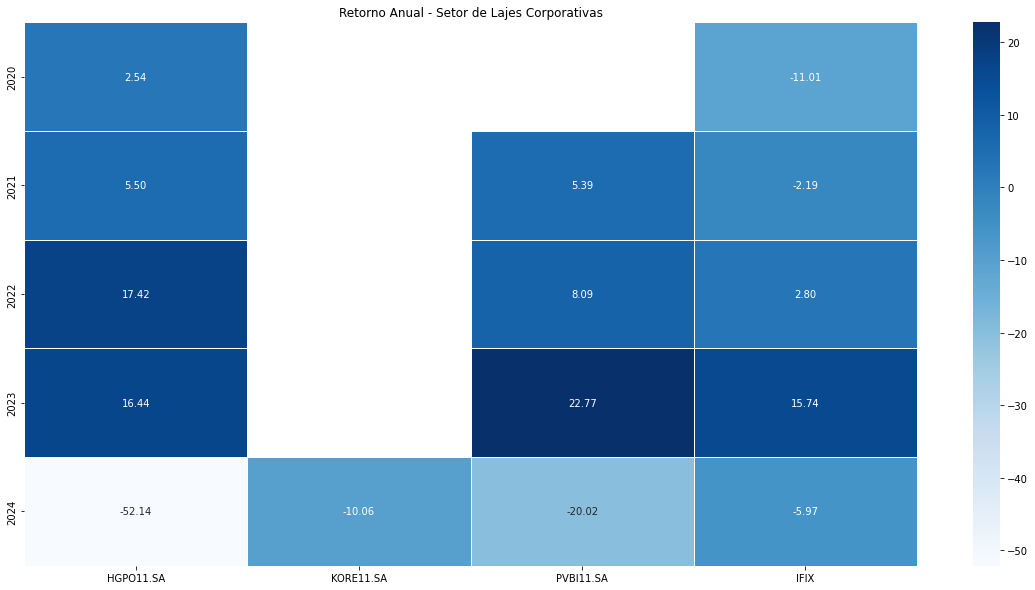

In [65]:
# Retorno anual
ret_anual_lajes = ret_anual(ticker=lst_ticker_fii_lajes, setor='Lajes Corporativas', df_benchmark=ifix_precos)

# Df para transformar em excel
df_ret_anual_lajes = ret_anual_lajes[0]

# Plot do retorno anual
ret_anual_lajes[1];

In [66]:
# Retorno acumulado
ret_acumulado_lajes = ret_acumulado(ticker=lst_ticker_fii_lajes, setor='Lajes Corporativas', df_benchmark=ifix_precos)

# Df para transformar em excel
df_ret_acumulado_lajes = ret_acumulado_lajes[0]

# Plot do retorno anual
ret_acumulado_lajes[1];

[*********************100%***********************]  3 of 3 completed


In [67]:
# Relação risco-retorno
plot_risk_return(ticker=lst_ticker_fii_lajes, setor='Lajes Corporativas')

[*********************100%***********************]  3 of 3 completed


In [68]:
# Transformando em um arquivo excel
with pd.ExcelWriter(f'C://Users//vitor//projetos_python//python_b3//composicao-fundos-de-investimentos//fundo_imobiliario//fii//fii_lajes.xlsx') as writer:
    fii_pvbi.to_excel(writer, sheet_name='PVBI11')
    fii_hgpo.to_excel(writer, sheet_name='HGPO11')
    fii_kore.to_excel(writer, sheet_name='KORE11')
    df_lajes_dy.to_excel(writer, sheet_name='DIVIDEND_YIELD')
    df_lajes_dy_accum.to_excel(writer, sheet_name='DIVIDEND_YIELD_ACUM')
    df_vol_drawdown_lajes.to_excel(writer, sheet_name='VOLATILIDADE_DRAWDOWN')
    df_ret_anual_lajes.to_excel(writer, sheet_name='RET_ANUAL')
    df_ret_acumulado_lajes.to_excel(writer, sheet_name='RET_ACUM')

### FI - Renda Urbana

In [69]:
# Lista dos tickers
lst_ticker_fii_renda_urbana = ['HGRU11.SA', 'TRXF11.SA', 'VIUR11.SA', 'RBVA11.SA']

# Carregando todos os dados dos FIIs
fii_hgru = fii_cnpj(df=df_ifix, cnpj='29.641.226/0001-53', ticker='HGRU11.SA')
fii_trxf = fii_cnpj(df=df_ifix, cnpj='28.548.288/0001-52', ticker='TRXF11.SA')
fii_viur = fii_cnpj(df=df_ifix, cnpj='36.445.587/0001-90', ticker='VIUR11.SA')
fii_rbva = fii_cnpj(df=df_ifix, cnpj='15.576.907/0001-70', ticker='RBVA11.SA')

# Mesclando todos os últimos dados
fii_renda_urbana = pd.concat([
    fii_hgru,
    fii_trxf,
    fii_viur,
    fii_rbva
])

# Mostrando os dados do últimos mês divulgado
fii_renda_urbana.loc[
    fii_renda_urbana.index[-1],
    ['Ticker', 'Close', 'Grau_Alavancagem', 'P/VP', 'Percentual_Rentabilidade_Efetiva_Mes', 'Percentual_Dividend_Yield_Mes']
].sort_values('P/VP', ascending=False)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


,Ticker,Close,Grau_Alavancagem,P/VP,Percentual_Rentabilidade_Efetiva_Mes,Percentual_Dividend_Yield_Mes
Data_Referencia,,,,,,
2025-06-01,HGRU11,122.315666,11.655810,0.96,2.83,1.23
2025-06-01,TRXF11,100.196472,25.485869,0.96,2.95,1.71
2025-06-01,RBVA11,8.340214,11.808073,0.78,0.60,0.84
2025-06-01,VIUR11,5.603640,31.744917,0.64,0.67,0.77


In [70]:
# Histórico do indicador P/VP dos FIIs 
historico_p_vp_renda_urbana = plot_historico_p_vp(df=fii_renda_urbana, nome_segmento='Renda Urbana')
historico_p_vp_renda_urbana

In [71]:
fii_renda_urbana.loc[
    fii_renda_urbana['Ticker'] == 'HGRU11', 
    ['CNPJ_Fundo', 'Ticker', 'Close', 'Divida_Total', 'Grau_Alavancagem', 'P/VP', 'Percentual_Rentabilidade_Efetiva_Mes', 'Percentual_Dividend_Yield_Mes']
]

,CNPJ_Fundo,Ticker,Close,Divida_Total,Grau_Alavancagem,P/VP,Percentual_Rentabilidade_Efetiva_Mes,Percentual_Dividend_Yield_Mes
Data_Referencia,,,,,,,,
2022-01-01,29.641.226/0001-53,HGRU11,83.174194,0.000000e+00,0.000000,0.70,0.67,0.64
2022-02-01,29.641.226/0001-53,HGRU11,81.476738,1.363739e+08,5.827638,0.69,0.56,0.64
2022-03-01,29.641.226/0001-53,HGRU11,80.884445,1.359981e+08,5.800913,0.68,0.84,0.69
2022-04-01,29.641.226/0001-53,HGRU11,84.036926,1.591706e+08,6.720466,0.71,0.70,0.69
2022-05-01,29.641.226/0001-53,HGRU11,86.757408,1.560062e+08,6.577900,0.73,0.86,0.69
2022-06-01,29.641.226/0001-53,HGRU11,87.570984,1.605040e+08,6.772822,0.74,0.35,1.01
2022-07-01,29.641.226/0001-53,HGRU11,89.098305,1.609147e+08,6.810658,0.75,0.68,0.69
2022-08-01,29.641.226/0001-53,HGRU11,95.958839,1.540281e+08,6.505010,0.81,1.24,0.69
2022-09-01,29.641.226/0001-53,HGRU11,97.682716,1.506325e+08,6.354183,0.82,0.98,0.69


In [72]:
fii_renda_urbana.loc[
    fii_renda_urbana['Ticker'] == 'TRXF11', 
    ['CNPJ_Fundo', 'Ticker', 'Close', 'Divida_Total', 'Grau_Alavancagem', 'P/VP', 'Percentual_Rentabilidade_Efetiva_Mes', 'Percentual_Dividend_Yield_Mes']
]

,CNPJ_Fundo,Ticker,Close,Divida_Total,Grau_Alavancagem,P/VP,Percentual_Rentabilidade_Efetiva_Mes,Percentual_Dividend_Yield_Mes
Data_Referencia,,,,,,,,
2022-01-01,28.548.288/0001-52,TRXF11,68.387001,7.558687e+08,49.876633,0.68,-0.32,0.79
2022-02-01,28.548.288/0001-52,TRXF11,68.278656,7.549651e+08,49.943302,0.68,-0.34,0.00
2022-03-01,28.548.288/0001-52,TRXF11,67.933350,7.184583e+08,48.737289,0.69,0.82,0.00
2022-04-01,28.548.288/0001-52,TRXF11,68.195488,7.199979e+08,49.017577,0.69,1.67,0.82
2022-05-01,28.548.288/0001-52,TRXF11,67.971283,8.050683e+08,52.148735,0.70,-0.14,0.86
2022-06-01,28.548.288/0001-52,TRXF11,68.296898,8.165008e+08,52.940200,0.70,1.43,1.07
2022-07-01,28.548.288/0001-52,TRXF11,72.410133,8.158649e+08,49.954423,0.70,6.54,0.89
2022-08-01,28.548.288/0001-52,TRXF11,77.874161,8.123993e+08,46.752468,0.75,0.98,0.89
2022-09-01,28.548.288/0001-52,TRXF11,82.068642,8.182237e+08,46.830779,0.80,0.08,0.82


In [73]:
fii_renda_urbana.loc[
    fii_renda_urbana['Ticker'] == 'VIUR11', 
    ['CNPJ_Fundo', 'Ticker', 'Close', 'Divida_Total', 'Grau_Alavancagem', 'P/VP', 'Percentual_Rentabilidade_Efetiva_Mes', 'Percentual_Dividend_Yield_Mes']
]

,CNPJ_Fundo,Ticker,Close,Divida_Total,Grau_Alavancagem,P/VP,Percentual_Rentabilidade_Efetiva_Mes,Percentual_Dividend_Yield_Mes
Data_Referencia,,,,,,,,
2022-01-01,36.445.587/0001-90,VIUR11,3.489672,1.198771e+08,30.514560,0.04,0.53,0.72
2022-02-01,36.445.587/0001-90,VIUR11,3.682656,1.206225e+08,30.690288,0.04,0.51,0.72
2022-03-01,36.445.587/0001-90,VIUR11,4.048995,1.217765e+08,30.908524,0.04,0.65,0.73
2022-04-01,36.445.587/0001-90,VIUR11,4.537309,1.232160e+08,31.250308,0.05,-0.49,0.00
2022-05-01,36.445.587/0001-90,VIUR11,5.132609,1.250997e+08,31.740144,0.54,-90.00,0.01
2022-06-01,36.445.587/0001-90,VIUR11,4.908083,1.261750e+08,32.012666,0.52,0.34,0.76
2022-07-01,36.445.587/0001-90,VIUR11,4.881808,1.261456e+08,32.906139,0.52,0.66,0.76
2022-08-01,36.445.587/0001-90,VIUR11,5.868230,1.255177e+08,32.765796,0.62,0.91,0.76
2022-09-01,36.445.587/0001-90,VIUR11,5.742805,1.243930e+08,32.522726,0.60,0.97,0.76


In [74]:
fii_renda_urbana.loc[
    fii_renda_urbana['Ticker'] == 'RBVA11', 
    ['CNPJ_Fundo', 'Ticker', 'Close', 'Divida_Total', 'Grau_Alavancagem', 'P/VP', 'Percentual_Rentabilidade_Efetiva_Mes', 'Percentual_Dividend_Yield_Mes']
]

,CNPJ_Fundo,Ticker,Close,Divida_Total,Grau_Alavancagem,P/VP,Percentual_Rentabilidade_Efetiva_Mes,Percentual_Dividend_Yield_Mes
Data_Referencia,,,,,,,,
2022-01-01,15.576.907/0001-70,RBVA11,6.624286,2.057155e+08,14.223049,0.06,-0.78,0.88
2022-02-01,15.576.907/0001-70,RBVA11,6.303746,2.044165e+08,14.152210,0.06,0.85,0.89
2022-03-01,15.576.907/0001-70,RBVA11,6.675145,2.032876e+08,14.091855,0.06,0.84,0.89
2022-04-01,15.576.907/0001-70,RBVA11,6.696759,2.016236e+08,13.995558,0.07,0.87,0.89
2022-05-01,15.576.907/0001-70,RBVA11,6.321800,2.004252e+08,13.923610,0.06,0.89,0.89
2022-06-01,15.576.907/0001-70,RBVA11,6.237795,1.991047e+08,13.802466,0.06,1.28,1.07
2022-07-01,15.576.907/0001-70,RBVA11,6.314469,1.979545e+08,13.746478,0.06,0.87,0.97
2022-08-01,15.576.907/0001-70,RBVA11,6.976296,1.967109e+08,13.672529,0.07,0.97,0.99
2022-09-01,15.576.907/0001-70,RBVA11,6.912909,1.954061e+08,13.611846,0.07,0.85,1.04


In [75]:
# Volatilidade anual
vol_anual_renda_urbana = vol_anual(ticker=lst_ticker_fii_renda_urbana, ano='2024').sort_values(ascending=False)

# Plotando a volatilidade anual
fig = go.Figure()

fig.add_trace(go.Bar(
    x=vol_anual_renda_urbana.index,
    y=vol_anual_renda_urbana.values
))

fig.update_layout(
    title_text='Volatilidade Anual - FIIs Renda Urbana',
    template='seaborn',
    showlegend=False   
)

fig.show()

[*********************100%***********************]  4 of 4 completed


In [76]:
# Drawdown
drawdown_renda_urbana = drawdown(ticker=lst_ticker_fii_renda_urbana).sort_values(ascending=False)

# Plotando o drawndown
fig = go.Figure()

fig.add_trace(go.Bar(
    x=drawdown_renda_urbana.index,
    y=drawdown_renda_urbana.values
))

fig.update_layout(
    title_text='Drawdown - FIIs Renda Urbana',
    template='seaborn',
    showlegend=False   
)

fig.show()

[*********************100%***********************]  4 of 4 completed


In [77]:
# Criando um df da volatilidade anual e o drawdown
df_vol_drawdown_renda_urbana = pd.DataFrame([vol_anual_renda_urbana, drawdown_renda_urbana], index=['volatilidade_anual', 'drawndown']).T
df_vol_drawdown_renda_urbana

,volatilidade_anual,drawndown
Ticker,,
VIUR11.SA,21.39,-32.52
RBVA11.SA,13.61,-25.92
HGRU11.SA,11.12,-16.54
TRXF11.SA,9.59,-11.48


In [78]:
# Dividend yield médio, máximo e mínimo dos FII 
df_renda_urbana_dy = dy_fii(df=fii_renda_urbana)

# Plotando o dividend yield médio, máximo e mínimo
fig = make_subplots(
    rows=3, 
    cols=1,
    subplot_titles=[
        'Dividend Yield Médio',
        'Dividend Yield Máximo',
        'Dividend Yield Mínimo'
    ],
    vertical_spacing=0.1
    )

fig.add_trace(go.Bar(
    x=df_renda_urbana_dy.index,
    y=df_renda_urbana_dy['dy_medio'],
    name='DY médio'
), row=1, col=1)

fig.add_trace(go.Bar(
    x=df_renda_urbana_dy.index,
    y=df_renda_urbana_dy['dy_max'],
     name='DY máximo'
), row=2, col=1)

fig.add_trace(go.Bar(
    x=df_renda_urbana_dy.index,
    y=df_renda_urbana_dy['dy_min'],
     name='DY mínimo'
), row=3, col=1)

fig.update_layout(
    title='Dividend yield dos FII de Renda Urbana',
    height=1200)

fig.show()

In [79]:
# DY acumulado dos últimos 12 meses
df_renda_urbana_dy_accum = dy_fii_acumm_12m(df=fii_renda_urbana)

# Plotando o DY acumulados dos últimos 12 meses
fig = go.Figure()

for empresa in df_renda_urbana_dy_accum.columns:
    fig.add_trace(go.Scatter(
        x=df_renda_urbana_dy_accum.index,
        y=df_renda_urbana_dy_accum[empresa],
        name=empresa
    ))

fig.update_layout(title='Dividend yield acumulados dos últmos 12 meses - FII de Renda Urbana')

fig.show()

[*********************100%***********************]  4 of 4 completed


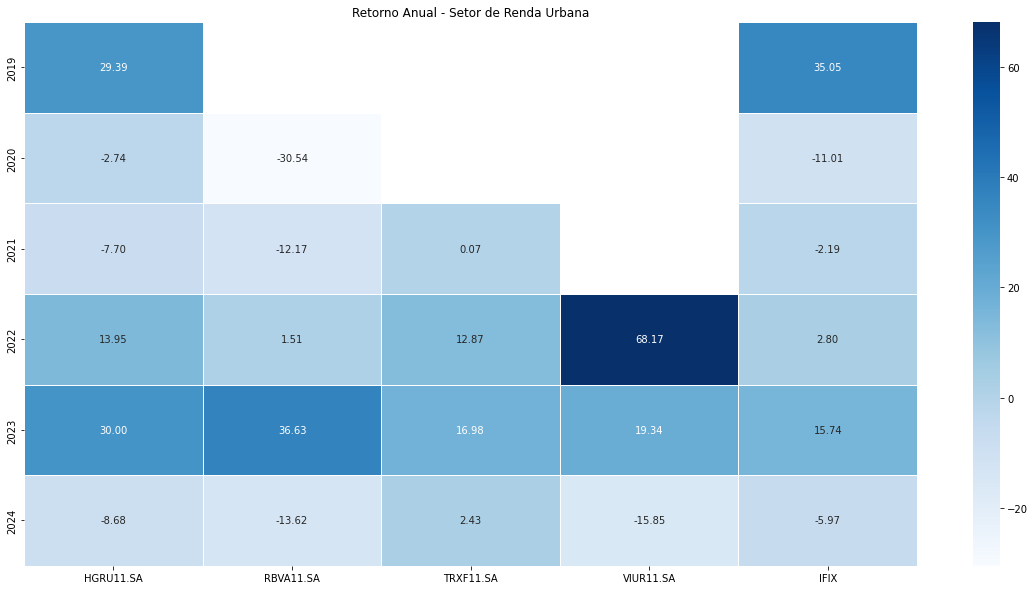

In [80]:
# Retorno anual
ret_anual_renda_urbana = ret_anual(ticker=lst_ticker_fii_renda_urbana, setor='Renda Urbana', df_benchmark=ifix_precos)

# Df para transformar em excel
df_ret_anual_renda_urbana = ret_anual_renda_urbana[0]

# Plot do retorno anual
ret_anual_renda_urbana[1];

In [81]:
# Retorno acumulado
ret_acumulado_renda_urbana = ret_acumulado(ticker=lst_ticker_fii_renda_urbana, setor='Renda Urbana', df_benchmark=ifix_precos)

# Df para transformar em excel
df_ret_acumulado_renda_urbana = ret_acumulado_renda_urbana[0]

# Plot do retorno anual
ret_acumulado_renda_urbana[1];

[*********************100%***********************]  4 of 4 completed


In [82]:
# Relação risco-retorno
plot_risk_return(ticker=lst_ticker_fii_renda_urbana, setor='Renda Urbana')

[*********************100%***********************]  4 of 4 completed


In [83]:
# Transformando em um arquivo excel
with pd.ExcelWriter(f'C://Users//vitor//projetos_python//python_b3//composicao-fundos-de-investimentos//fundo_imobiliario//fii//fii_renda_urbana.xlsx') as writer:
    fii_hgru.to_excel(writer, sheet_name='HGRU11')
    fii_trxf.to_excel(writer, sheet_name='TRXF11')
    fii_viur.to_excel(writer, sheet_name='VIUR11')
    fii_rbva.to_excel(writer, sheet_name='RBVA11')
    df_renda_urbana_dy.to_excel(writer, sheet_name='DIVIDEND_YIELD')
    df_renda_urbana_dy_accum.to_excel(writer, sheet_name='DIVIDEND_YIELD_ACUM')
    df_vol_drawdown_renda_urbana.to_excel(writer, sheet_name='VOLATILIDADE_DRAWDOWN')
    df_ret_anual_renda_urbana.to_excel(writer, sheet_name='RET_ANUAL')
    df_ret_acumulado_renda_urbana.to_excel(writer, sheet_name='RET_ACUM')

### FI - Papel

In [84]:
# Lista dos tickers
lst_ticker_fii_papel = ['KNIP11.SA', 'KNCR11.SA', 'KNSC11.SA', 'HGCR11.SA', 'MXRF11.SA', 'VGIR11.SA']

# Carregando todos os dados dos FIIs
fii_knip = fii_cnpj(df=df_ifix, cnpj='24.960.430/0001-13', ticker='KNIP11.SA')
fii_kncr = fii_cnpj(df=df_ifix, cnpj='16.706.958/0001-32', ticker='KNCR11.SA')
fii_knsc = fii_cnpj(df=df_ifix, cnpj='35.864.448/0001-38', ticker='KNSC11.SA')
fii_hgcr = fii_cnpj(df=df_ifix, cnpj='11.160.521/0001-22', ticker='HGCR11.SA')
fii_mxrf = fii_cnpj(df=df_ifix, cnpj='97.521.225/0001-25', ticker='MXRF11.SA')
fii_vgir = fii_cnpj(df=df_ifix, cnpj='29.852.732/0001-91', ticker='VGIR11.SA')

# Mesclando todos os últimos dados
fii_papel = pd.concat([
    fii_knip,
    fii_kncr,
    fii_knsc,
    fii_hgcr,
    fii_mxrf,
    fii_vgir
])

# Mostrando os dados do último mês divulgado
fii_papel.loc[
    fii_papel.index[-1],
    ['Ticker', 'Close', 'P/VP', 'Percentual_Rentabilidade_Efetiva_Mes', 'Percentual_Dividend_Yield_Mes']
].sort_values('P/VP', ascending=False)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


,Ticker,Close,P/VP,Percentual_Rentabilidade_Efetiva_Mes,Percentual_Dividend_Yield_Mes
Data_Referencia,,,,,
2025-06-01,KNCR11,102.662727,1.01,1.17,1.18
2025-06-01,KNSC11,8.759999,0.99,1.08,1.02
2025-06-01,MXRF11,9.321876,0.98,1.56,1.09
2025-06-01,KNIP11,89.366821,0.97,0.86,0.87
2025-06-01,VGIR11,9.397755,0.96,1.11,1.06
2025-06-01,HGCR11,92.566231,0.95,1.19,1.08


In [85]:
# Histórico do indicador P/VP dos FIIs 
historico_p_vp_papel = plot_historico_p_vp(df=fii_papel, nome_segmento='Papel')
historico_p_vp_papel

In [86]:
fii_papel.loc[
    fii_papel['Ticker'] == 'KNIP11', 
    ['CNPJ_Fundo', 'Ticker', 'Close', 'Divida_Total', 'Grau_Alavancagem', 'P/VP', 'Percentual_Rentabilidade_Efetiva_Mes', 'Percentual_Dividend_Yield_Mes']
]

,CNPJ_Fundo,Ticker,Close,Divida_Total,Grau_Alavancagem,P/VP,Percentual_Rentabilidade_Efetiva_Mes,Percentual_Dividend_Yield_Mes
Data_Referencia,,,,,,,,
2022-01-01,24.960.430/0001-13,KNIP11,70.344727,0.0,0.0,0.72,-0.24,1.37
2022-02-01,24.960.430/0001-13,KNIP11,69.129562,0.0,0.0,0.71,0.25,1.11
2022-03-01,24.960.430/0001-13,KNIP11,68.731262,0.0,0.0,0.70,3.38,1.39
2022-04-01,24.960.430/0001-13,KNIP11,70.038002,0.0,0.0,0.72,0.62,1.72
2022-05-01,24.960.430/0001-13,KNIP11,71.659035,0.0,0.0,0.73,1.62,1.74
2022-06-01,24.960.430/0001-13,KNIP11,71.581230,0.0,0.0,0.74,0.05,1.54
2022-07-01,24.960.430/0001-13,KNIP11,70.080521,0.0,0.0,0.74,-0.27,1.08
2022-08-01,24.960.430/0001-13,KNIP11,67.932228,0.0,0.0,0.71,1.54,0.61
2022-09-01,24.960.430/0001-13,KNIP11,66.749161,0.0,0.0,0.70,0.69,0.37


In [87]:
fii_papel.loc[
    fii_papel['Ticker'] == 'KNCR11', 
    ['CNPJ_Fundo', 'Ticker', 'Close', 'Divida_Total', 'Grau_Alavancagem', 'P/VP', 'Percentual_Rentabilidade_Efetiva_Mes', 'Percentual_Dividend_Yield_Mes']
]

,CNPJ_Fundo,Ticker,Close,Divida_Total,Grau_Alavancagem,P/VP,Percentual_Rentabilidade_Efetiva_Mes,Percentual_Dividend_Yield_Mes
Data_Referencia,,,,,,,,
2022-01-01,16.706.958/0001-32,KNCR11,65.886765,0.0,0.0,0.65,0.86,0.81
2022-02-01,16.706.958/0001-32,KNCR11,64.696213,0.0,0.0,0.64,0.77,0.82
2022-03-01,16.706.958/0001-32,KNCR11,65.550316,0.0,0.0,0.65,1.18,0.99
2022-04-01,16.706.958/0001-32,KNCR11,66.639664,0.0,0.0,0.66,0.96,0.96
2022-05-01,16.706.958/0001-32,KNCR11,67.620758,0.0,0.0,0.67,1.09,1.07
2022-06-01,16.706.958/0001-32,KNCR11,67.978691,0.0,0.0,0.67,1.00,1.04
2022-07-01,16.706.958/0001-32,KNCR11,69.020737,0.0,0.0,0.68,1.45,1.14
2022-08-01,16.706.958/0001-32,KNCR11,70.093918,0.0,0.0,0.69,1.05,1.28
2022-09-01,16.706.958/0001-32,KNCR11,70.573723,0.0,0.0,0.70,0.86,1.19


In [88]:
fii_papel.loc[
    fii_papel['Ticker'] == 'KNSC11', 
    ['CNPJ_Fundo', 'Ticker', 'Close', 'Divida_Total', 'Grau_Alavancagem', 'P/VP', 'Percentual_Rentabilidade_Efetiva_Mes', 'Percentual_Dividend_Yield_Mes']
]

,CNPJ_Fundo,Ticker,Close,Divida_Total,Grau_Alavancagem,P/VP,Percentual_Rentabilidade_Efetiva_Mes,Percentual_Dividend_Yield_Mes
Data_Referencia,,,,,,,,
2022-02-01,35.864.448/0001-38,KNSC11,6.335593,0.0,0.0,0.07,0.36,1.12
2022-03-01,35.864.448/0001-38,KNSC11,6.453264,0.0,0.0,0.07,2.50,0.97
2022-04-01,35.864.448/0001-38,KNSC11,6.369028,0.0,0.0,0.07,0.87,1.27
2022-05-01,35.864.448/0001-38,KNSC11,6.410377,0.0,0.0,0.07,1.30,1.51
2022-06-01,35.864.448/0001-38,KNSC11,6.497187,0.0,0.0,0.07,0.45,1.22
2022-07-01,35.864.448/0001-38,KNSC11,6.372652,0.0,0.0,0.07,0.51,1.03
2022-08-01,35.864.448/0001-38,KNSC11,6.013305,0.0,0.0,0.07,1.33,0.79
2022-09-01,35.864.448/0001-38,KNSC11,6.090752,0.0,0.0,0.07,1.07,0.56
2022-10-01,35.864.448/0001-38,KNSC11,6.344748,0.0,0.0,0.07,1.06,0.58


In [89]:
fii_papel.loc[
    fii_papel['Ticker'] == 'HGCR11', 
    ['CNPJ_Fundo', 'Ticker', 'Close', 'Divida_Total', 'Grau_Alavancagem', 'P/VP', 'Percentual_Rentabilidade_Efetiva_Mes', 'Percentual_Dividend_Yield_Mes']
]

,CNPJ_Fundo,Ticker,Close,Divida_Total,Grau_Alavancagem,P/VP,Percentual_Rentabilidade_Efetiva_Mes,Percentual_Dividend_Yield_Mes
Data_Referencia,,,,,,,,
2022-01-01,11.160.521/0001-22,HGCR11,69.919205,0.0,0.0,0.69,0.05,1.00
2022-02-01,11.160.521/0001-22,HGCR11,67.897209,0.0,0.0,0.67,0.96,1.03
2022-03-01,11.160.521/0001-22,HGCR11,69.448433,0.0,0.0,0.67,2.43,1.03
2022-04-01,11.160.521/0001-22,HGCR11,69.350090,0.0,0.0,0.68,0.70,1.07
2022-05-01,11.160.521/0001-22,HGCR11,70.224442,0.0,0.0,0.68,1.16,1.12
2022-06-01,11.160.521/0001-22,HGCR11,70.632912,0.0,0.0,0.69,1.13,1.17
2022-07-01,11.160.521/0001-22,HGCR11,70.050415,0.0,0.0,0.69,0.39,1.17
2022-08-01,11.160.521/0001-22,HGCR11,71.304482,0.0,0.0,0.70,1.44,1.18
2022-09-01,11.160.521/0001-22,HGCR11,72.613251,0.0,0.0,0.71,1.02,1.18


In [90]:
fii_papel.loc[
    fii_papel['Ticker'] == 'MXRF11', 
    ['CNPJ_Fundo', 'Ticker', 'Close', 'Divida_Total', 'Grau_Alavancagem', 'P/VP', 'Percentual_Rentabilidade_Efetiva_Mes', 'Percentual_Dividend_Yield_Mes']
]

,CNPJ_Fundo,Ticker,Close,Divida_Total,Grau_Alavancagem,P/VP,Percentual_Rentabilidade_Efetiva_Mes,Percentual_Dividend_Yield_Mes
Data_Referencia,,,,,,,,
2022-01-01,97.521.225/0001-25,MXRF11,6.096547,0.00,0.000000,0.60,0.64,0.90
2022-02-01,97.521.225/0001-25,MXRF11,6.024670,0.00,0.000000,0.59,0.36,0.87
2022-03-01,97.521.225/0001-25,MXRF11,6.050808,0.00,0.000000,0.59,1.01,1.03
2022-04-01,97.521.225/0001-25,MXRF11,6.501677,0.00,0.000000,0.65,-0.29,1.00
2022-05-01,97.521.225/0001-25,MXRF11,6.547816,0.00,0.000000,0.64,1.86,0.84
2022-06-01,97.521.225/0001-25,MXRF11,6.467526,0.00,0.000000,0.64,1.09,1.25
2022-07-01,97.521.225/0001-25,MXRF11,6.642946,0.00,0.000000,0.66,1.03,1.30
2022-08-01,97.521.225/0001-25,MXRF11,7.052869,0.00,0.000000,0.70,1.23,0.97
2022-09-01,97.521.225/0001-25,MXRF11,7.114922,0.00,0.000000,0.70,0.93,0.99


In [91]:
fii_papel.loc[
    fii_papel['Ticker'] == 'VGIR11', 
    ['CNPJ_Fundo', 'Ticker', 'Close', 'Divida_Total', 'Grau_Alavancagem', 'P/VP', 'Percentual_Rentabilidade_Efetiva_Mes', 'Percentual_Dividend_Yield_Mes']
]

,CNPJ_Fundo,Ticker,Close,Divida_Total,Grau_Alavancagem,P/VP,Percentual_Rentabilidade_Efetiva_Mes,Percentual_Dividend_Yield_Mes
Data_Referencia,,,,,,,,
2022-01-01,29.852.732/0001-91,VGIR11,6.115067,0.0,0.0,0.06,0.75,1.65
2022-02-01,29.852.732/0001-91,VGIR11,6.137150,0.0,0.0,0.06,1.14,1.35
2022-03-01,29.852.732/0001-91,VGIR11,6.211764,0.0,0.0,0.06,1.43,1.18
2022-04-01,29.852.732/0001-91,VGIR11,6.343628,0.0,0.0,0.07,0.23,0.67
2022-05-01,29.852.732/0001-91,VGIR11,6.216518,0.0,0.0,0.06,1.20,1.39
2022-06-01,29.852.732/0001-91,VGIR11,6.274801,0.0,0.0,0.07,0.95,0.84
2022-07-01,29.852.732/0001-91,VGIR11,6.509944,0.0,0.0,0.07,1.36,1.37
2022-08-01,29.852.732/0001-91,VGIR11,6.582706,0.0,0.0,0.07,1.46,1.45
2022-09-01,29.852.732/0001-91,VGIR11,6.694661,0.0,0.0,0.69,1.34,1.43


In [92]:
# Volatilidade anual
vol_anual_papel = vol_anual(ticker=lst_ticker_fii_papel, ano='2024').sort_values(ascending=False)

# Plotando a volatilidade anual
fig = go.Figure()

fig.add_trace(go.Bar(
    x=vol_anual_papel.index,
    y=vol_anual_papel.values
))

fig.update_layout(
    title_text='Volatilidade Anual - FIIs Papel',
    template='seaborn',
    showlegend=False   
)

fig.show()

[*********************100%***********************]  6 of 6 completed


In [93]:
# Drawdown
drawdown_papel = drawdown(ticker=lst_ticker_fii_papel).sort_values(ascending=False)

# Plotando o drawndown
fig = go.Figure()

fig.add_trace(go.Bar(
    x=drawdown_papel.index,
    y=drawdown_papel.values
))

fig.update_layout(
    title_text='Drawdown - FIIs Papel',
    template='seaborn',
    showlegend=False   
)

fig.show()

[*********************100%***********************]  6 of 6 completed


In [94]:
# Criando um df da volatilidade anual e o drawdown
df_vol_drawdown_papel = pd.DataFrame([vol_anual_papel, drawdown_papel], index=['volatilidade_anual', 'drawndown']).T
df_vol_drawdown_papel

,volatilidade_anual,drawndown
Ticker,,
KNSC11.SA,12.85,-13.26
VGIR11.SA,11.39,-14.60
HGCR11.SA,11.01,-13.69
MXRF11.SA,10.62,-9.79
KNCR11.SA,9.12,-7.02
KNIP11.SA,8.00,-9.61


In [95]:
# Dividend yield médio, máximo e mínimo dos FII 
df_papel_dy = dy_fii(df=fii_papel)

# Plotando o dividend yield médio, máximo e mínimo
fig = make_subplots(
    rows=3, 
    cols=1,
    subplot_titles=[
        'Dividend Yield Médio',
        'Dividend Yield Máximo',
        'Dividend Yield Mínimo'
    ],
    vertical_spacing=0.1
    )

fig.add_trace(go.Bar(
    x=df_papel_dy.index,
    y=df_papel_dy['dy_medio'],
    name='DY médio'
), row=1, col=1)

fig.add_trace(go.Bar(
    x=df_papel_dy.index,
    y=df_papel_dy['dy_max'],
     name='DY máximo'
), row=2, col=1)

fig.add_trace(go.Bar(
    x=df_papel_dy.index,
    y=df_papel_dy['dy_min'],
     name='DY mínimo'
), row=3, col=1)

fig.update_layout(
    title='Dividend yield dos FII de Papel',
    height=1200)

fig.show()

In [96]:
# DY acumulado dos últimos 12 meses
df_papel_dy_accum = dy_fii_acumm_12m(df=fii_papel)

# Plotando o DY acumulados dos últimos 12 meses
fig = go.Figure()

for empresa in df_papel_dy_accum.columns:
    fig.add_trace(go.Scatter(
        x=df_papel_dy_accum.index,
        y=df_papel_dy_accum[empresa],
        name=empresa
    ))

fig.update_layout(title='Dividend yield acumulados dos últmos 12 meses - FII de Papel')

fig.show()

[*********************100%***********************]  6 of 6 completed


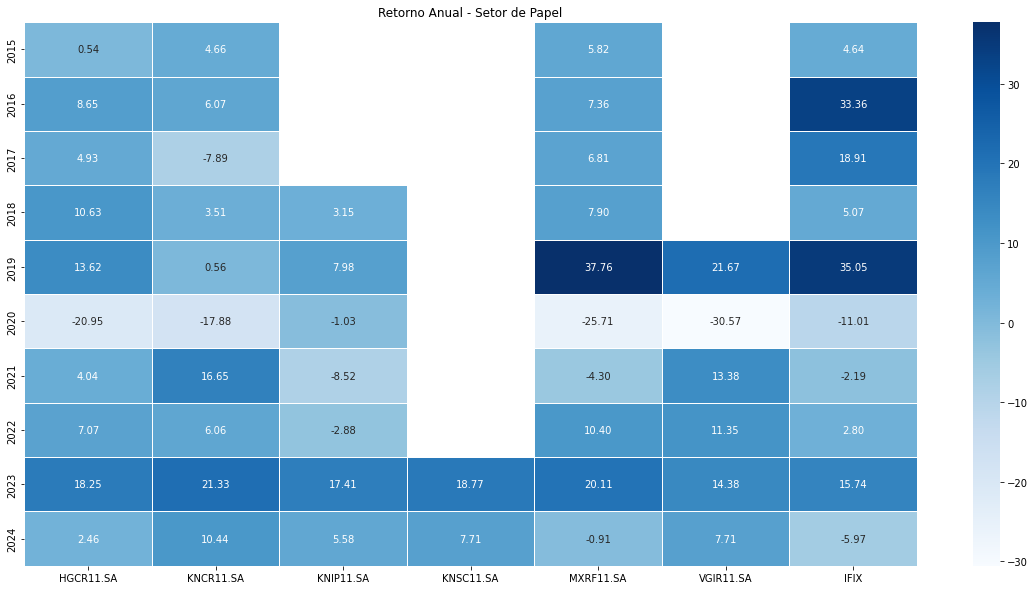

In [97]:
# Retorno anual
ret_anual_papel = ret_anual(ticker=lst_ticker_fii_papel, setor='Papel', df_benchmark=ifix_precos)

# Df para transformar em excel
df_ret_anual_papel = ret_anual_papel[0]

# Plot do retorno anual
ret_anual_papel[1];

In [98]:
# Retorno acumulado
ret_acumulado_papel = ret_acumulado(ticker=lst_ticker_fii_papel, setor='Papel', df_benchmark=ifix_precos)

# Df para transformar em excel
df_ret_acumulado_papel = ret_acumulado_papel[0]

# Plot do retorno anual
ret_acumulado_papel[1];

[*********************100%***********************]  6 of 6 completed


In [99]:
# Relação risco-retorno
plot_risk_return(ticker=lst_ticker_fii_papel, setor='Papel')

[*********************100%***********************]  6 of 6 completed


#### Análisando a carteira de CRIs dos FIIs

In [100]:
# KNIP11
df_cris_knip = pd.read_excel(
    io='C://Users//vitor//projetos_python//python_b3//composicao-fundos-de-investimentos//fundo_imobiliario//cris//knip11_062025.xlsx',
    sheet_name='Carteira de Ativos',
    header=10
)

# Removendo colunas
df_cris_knip = df_cris_knip.drop(columns=['Unnamed: 0', 'Unnamed: 1', 'AGENTE FIDUCIÁRIO'])

# Selecionando as principais colunas
df_cris_knip = df_cris_knip[[
    'ATIVO', 
    'DEVEDOR / ATIVO IMOBILIARIO', 
    'INDEX.', 
    '% DA CARTEIRA', 
    'TAXA AQUISIÇÃO', 
    'TAXA MTM', 
    'LTV', 
    'VENCIMENTO DO CRI'
]]

# Arrumando o dtypes das colunas
df_cris_knip['TAXA AQUISIÇÃO'] = df_cris_knip['TAXA AQUISIÇÃO'].replace('-', 0).astype(float)
df_cris_knip['TAXA MTM'] = df_cris_knip['TAXA MTM'].replace('-', 0).astype(float)

# Preenchendo os NaN
df_cris_knip['LTV'] = df_cris_knip['LTV'].fillna(0)

# Análise do LTV
ltv_knip_media_ponderada = round(np.average(df_cris_knip.loc[df_cris_knip['ATIVO'] == 'CRI', 'LTV'], weights=df_cris_knip.loc[df_cris_knip['ATIVO'] == 'CRI', '% DA CARTEIRA']) * 100, 2)
ltv_knip_media = round(df_cris_knip.loc[df_cris_knip['ATIVO'] == 'CRI', 'LTV'].mean() * 100, 2)
ltv_knip_max = round(df_cris_knip.loc[df_cris_knip['ATIVO'] == 'CRI', 'LTV'].max() * 100, 2)
ltv_knip_min = round(df_cris_knip.loc[df_cris_knip['ATIVO'] == 'CRI', 'LTV'].min() * 100, 2)
ltv_knip_num_zero = len(df_cris_knip.loc[(df_cris_knip['ATIVO'] == 'CRI') & (df_cris_knip['LTV'] == 0)])

# Números total de ativos
num_ativos_knip = len(df_cris_knip)

# Número total de CRIs
num_cris_knip = len(df_cris_knip.loc[df_cris_knip['ATIVO'] == 'CRI'])

# Tipos de ativos no portfólio
ativos_knip = df_cris_knip['ATIVO'].unique()
# Transformando a lista em uma string única
ativos_knip = ', '.join(ativos_knip) 

# Contando os números de cada ativo do KNIP11
tipo_ativos_knip = df_cris_knip.loc[:, 'ATIVO'].value_counts()

# Contagem dos CRIs no KNIP11 por índice
tipo_cri_knip = df_cris_knip.loc[df_cris_knip['ATIVO'] == 'CRI', 'INDEX.'].value_counts()

# Tipos de indexadores
indexadores_knip = tipo_cri_knip.index
# Transformando a lista em uma string única
indexadores_knip = ', '.join(indexadores_knip)
# Retirando a string '+'
indexadores_knip = indexadores_knip.replace('+', '').strip()

# Plotando o subplot
fig = make_subplots(
    rows=2,
    cols=1,
    specs=[[{'type':'domain'}], [{'type':'domain'}]],
    subplot_titles=(
        'Distribuição dos ativos',
        'Distribuição dos indexadores dos CRIs'),
    vertical_spacing=0.08  # Aumentando o espaçamento vertical
)

fig.add_trace(go.Pie(
    values=tipo_ativos_knip, 
    labels=tipo_ativos_knip.index,
    legendgroup='ativos_knip',  
    showlegend=True,
    textposition='inside',
    ), 
    row=1, col=1
)

fig.add_trace(go.Pie(
    values=tipo_cri_knip, 
    labels=tipo_cri_knip.index,
    legendgroup='cri_knip', 
    showlegend=True,
    textposition='inside',
    ), 
    row=2, col=1
)

fig.update_layout(
    title_text='Distribuição dos Ativos e Indexadores dos CRIs - KNIP11',
    height=1000
)

fig.show()

In [101]:
# CRIs que estão ganhando com marcação a mercado
df_cris_knip.loc[df_cris_knip['TAXA AQUISIÇÃO'] > df_cris_knip['TAXA MTM']]

,ATIVO,DEVEDOR / ATIVO IMOBILIARIO,INDEX.,% DA CARTEIRA,TAXA AQUISIÇÃO,TAXA MTM,LTV,VENCIMENTO DO CRI
75,CRI,Creditas – 154 – Sênior A,IPCA +,0.001970,0.0850,0.080381,0.43,2044-07-20
76,CRI,Creditas – 154 – Sênior A,IPCA +,0.001899,0.0825,0.081937,0.43,2044-09-20
77,CRI,Creditas – 154 – Sênior A,IPCA +,0.001889,0.0850,0.084768,0.43,2044-09-20
78,CRI,Creditas – 154 – Sênior A,IPCA +,0.001885,0.0849,0.084203,0.43,2044-09-20
80,CRI,Tenda – Carteira Pro-soluto 448,IPCA +,0.001869,0.0990,0.097952,0.00,2033-12-20
82,CRI,Creditas – 154 – Sênior A,IPCA +,0.001784,0.0850,0.084036,0.43,2044-10-20
83,CRI,Creditas – 154 – Sênior A,IPCA +,0.001736,0.0851,0.083809,0.43,2044-10-20
85,CRI,MALL - Rio Anil Shopping,IPCA +,0.001598,0.0845,0.079872,0.40,2034-12-28
87,CRI,Bemol – Home Equity 87 – Sênior,IPCA +,0.001530,0.0940,0.091593,0.30,2039-11-25
88,CRI,Creditas – 154 – Sênior A,IPCA +,0.001293,0.0865,0.082123,0.43,2044-08-22


In [102]:
# KNCR11
df_cris_kncr = pd.read_excel(
    io='C://Users//vitor//projetos_python//python_b3//composicao-fundos-de-investimentos//fundo_imobiliario//cris//kncr11_062025.xlsx',
    sheet_name='Carteira de Ativos',
    header=10
)

# Removendo colunas
df_cris_kncr = df_cris_kncr.drop(columns=['Unnamed: 0', 'Unnamed: 1', 'AGENTE FIDUCIÁRIO'])

# Selecionando as principais colunas
df_cris_kncr = df_cris_kncr[[
    'ATIVO', 
    'DEVEDOR / ATIVO IMOBILIARIO', 
    'INDEX.', 
    '% DA CARTEIRA', 
    'TAXA AQUISIÇÃO', 
    'TAXA MTM', 
    'LTV', 
    'VENCIMENTO DO CRI'
]]

# Arrumando o dtypes das colunas
df_cris_kncr['TAXA AQUISIÇÃO'] = df_cris_kncr['TAXA AQUISIÇÃO'].replace('-', 0).astype(float)
df_cris_kncr['TAXA MTM'] = df_cris_kncr['TAXA MTM'].replace('-', 0).astype(float)

# Preenchendo os NaN
df_cris_kncr['LTV'] = df_cris_kncr['LTV'].fillna(0)

# Análise do LTV
ltv_kncr_media_ponderada = round(np.average(df_cris_kncr.loc[df_cris_kncr['ATIVO'] == 'CRI', 'LTV'], weights=df_cris_kncr.loc[df_cris_kncr['ATIVO'] == 'CRI', '% DA CARTEIRA']) * 100, 2)
ltv_kncr_media = round(df_cris_kncr.loc[df_cris_kncr['ATIVO'] == 'CRI', 'LTV'].mean() * 100, 2)
ltv_kncr_max = round(df_cris_kncr.loc[df_cris_kncr['ATIVO'] == 'CRI', 'LTV'].max() * 100, 2)
ltv_kncr_min = round(df_cris_kncr.loc[df_cris_kncr['ATIVO'] == 'CRI', 'LTV'].min() * 100, 2)
ltv_kncr_num_zero = len(df_cris_kncr.loc[(df_cris_kncr['ATIVO'] == 'CRI') & (df_cris_kncr['LTV'] == 0)])

# Números total de ativos
num_ativos_kncr = len(df_cris_kncr)

# Número total de CRIs
num_cris_kncr = len(df_cris_kncr.loc[df_cris_kncr['ATIVO'] == 'CRI'])

# Tipos de ativos no portfólio
ativos_kncr = df_cris_kncr['ATIVO'].unique()
# Transformando a lista em uma string única
ativos_kncr = ', '.join(ativos_kncr) 

# Contando os números de cada ativo do KNCR11
tipo_ativos_kncr = df_cris_kncr.loc[:, 'ATIVO'].value_counts()

# Contagem dos CRIs no KNCR11 por índice
tipo_cri_kncr = df_cris_kncr.loc[df_cris_kncr['ATIVO'] == 'CRI', 'INDEX.'].value_counts()

# Tipos de indexadores
indexadores_kncr = tipo_cri_kncr.index
# Transformando a lista em uma string única
indexadores_kncr = ', '.join(indexadores_kncr)
# Retirando a string '+'
indexadores_kncr = indexadores_kncr.replace('+', '').strip()

# Plotando o subplot
fig = make_subplots(
    rows=2,
    cols=1,
    specs=[[{'type':'domain'}], [{'type':'domain'}]],
    subplot_titles=(
        'Distribuição dos ativos',
        'Distribuição dos indexadores dos CRIs'),
    vertical_spacing=0.08  # Aumentando o espaçamento vertical
)

fig.add_trace(go.Pie(
    values=tipo_ativos_kncr, 
    labels=tipo_ativos_kncr.index,
    legendgroup='ativos_kncr',  
    showlegend=True,
    textposition='inside',
    ), 
    row=1, col=1
)

fig.add_trace(go.Pie(
    values=tipo_cri_kncr, 
    labels=tipo_cri_kncr.index,
    legendgroup='cri_kncr', 
    showlegend=True,
    textposition='inside',
    ), 
    row=2, col=1
)

fig.update_layout(
    title_text='Distribuição dos Ativos e Indexadores dos CRIs - KNCR11',
    height=1000
)

fig.show()

In [103]:
# CRIs que estão ganhando com marcação a mercado
df_cris_kncr.loc[df_cris_kncr['TAXA AQUISIÇÃO'] > df_cris_kncr['TAXA MTM']]

,ATIVO,DEVEDOR / ATIVO IMOBILIARIO,INDEX.,% DA CARTEIRA,TAXA AQUISIÇÃO,TAXA MTM,LTV,VENCIMENTO DO CRI
3,CRI,Brookfield - Ed. Sigma,CDI +,0.035777,0.017970,0.017848,0.65,2029-01-25
14,CRI,CPOF - Ed. FL Plaza,CDI +,0.018700,0.020000,0.020000,0.55,2034-09-22
15,CRI,Even Estoque,CDI +,0.018121,0.025500,0.025500,0.66,2028-11-29
16,CRI,Brookfield - Ed. Sucupira,CDI +,0.017130,0.020000,0.013738,0.75,2027-06-17
17,CRI,JHSF BV Estates,CDI +,0.017008,0.029200,0.023626,0.50,2034-06-27
18,CRI,JHSF BV Estates,CDI +,0.016923,0.027400,0.023245,0.50,2034-06-27
21,CRI,CPOF - Ed. FL Plaza,CDI +,0.014960,0.020000,0.020000,0.55,2030-02-22
22,CRI,JHSF BV Estates,CDI +,0.014513,0.029200,0.023423,0.50,2031-10-27
26,CRI,HSML - Shopping Paralela II,CDI +,0.013537,0.028000,0.019508,0.41,2036-12-31
27,CRI,Brookfield CD Sakamoto,CDI +,0.013291,0.025700,0.021885,0.65,2027-09-27


In [104]:
# KNSC11
df_cris_knsc = pd.read_excel(
    io='C://Users//vitor//projetos_python//python_b3//composicao-fundos-de-investimentos//fundo_imobiliario//cris//knsc11_052025.xlsx',
    sheet_name='Carteira de Ativos',
    header=10
)

# Removendo colunas
df_cris_knsc = df_cris_knsc.drop(columns=['Unnamed: 0', 'Unnamed: 1', 'AGENTE FIDUCIÁRIO'])

# Selecionando as principais colunas
df_cris_knsc = df_cris_knsc[[
    'ATIVO', 
    'DEVEDOR / ATIVO IMOBILIARIO', 
    'INDEX.', 
    '% DA CARTEIRA', 
    'TAXA AQUISIÇÃO', 
    'TAXA MTM', 
    'LTV', 
    'VENCIMENTO DO CRI'
]]

# Arrumando o dtypes das colunas
df_cris_knsc['TAXA AQUISIÇÃO'] = df_cris_knsc['TAXA AQUISIÇÃO'].replace('-', 0).astype(float)
df_cris_knsc['TAXA MTM'] = df_cris_knsc['TAXA MTM'].replace('-', 0).astype(float)

# Preenchendo os NaN
df_cris_knsc['LTV'] = df_cris_knsc['LTV'].fillna(0)

# Análise do LTV
ltv_knsc_media_ponderada = round(np.average(df_cris_knsc.loc[df_cris_knsc['ATIVO']=='CRI', 'LTV'], weights=df_cris_knsc.loc[df_cris_knsc['ATIVO']=='CRI', '% DA CARTEIRA']) * 100, 2)
ltv_knsc_media = round(df_cris_knsc.loc[df_cris_knsc['ATIVO']=='CRI', 'LTV'].mean() * 100, 2)
ltv_knsc_max = round(df_cris_knsc.loc[df_cris_knsc['ATIVO']=='CRI', 'LTV'].max() * 100, 2)
ltv_knsc_min = round(df_cris_knsc.loc[df_cris_knsc['ATIVO']=='CRI', 'LTV'].min() * 100, 2)
ltv_knsc_num_zero = len(df_cris_knsc.loc[(df_cris_knsc['ATIVO'] == 'CRI') & (df_cris_knsc['LTV'] == 0)])

# Números total de ativos
num_ativos_knsc = len(df_cris_knsc)

# Número total de CRIs
num_cris_knsc = len(df_cris_knsc.loc[df_cris_knsc['ATIVO'] == 'CRI'])

# Tipos de ativos no portfólio
ativos_knsc = df_cris_knsc['ATIVO'].unique()
# Transformando a lista em uma string única
ativos_knsc = ', '.join(ativos_knsc) 

# Contando os números de cada ativo do KNCR11
tipo_ativos_knsc = df_cris_knsc.loc[:, 'ATIVO'].value_counts()

# Contagem dos CRIs no KNCR11 por índice
tipo_cri_knsc = df_cris_knsc.loc[df_cris_knsc['ATIVO'] == 'CRI', 'INDEX.'].value_counts()

# Tipos de indexadores
indexadores_knsc = tipo_cri_knsc.index
# Transformando a lista em uma string única
indexadores_knsc = ', '.join(indexadores_knsc)
# Retirando a string '+'
indexadores_knsc = indexadores_knsc.replace('+', '').strip()

# Plotando o subplot
fig = make_subplots(
    rows=2,
    cols=1,
    specs=[[{'type':'domain'}], [{'type':'domain'}]],
    subplot_titles=(
        'Distribuição dos ativos',
        'Distribuição dos indexadores dos CRIs'),
    vertical_spacing=0.08  # Aumentando o espaçamento vertical
)

fig.add_trace(go.Pie(
    values=tipo_ativos_knsc, 
    labels=tipo_ativos_knsc.index,
    legendgroup='ativos_knsc',  
    showlegend=True,
    textposition='inside',
    ), 
    row=1, col=1
)

fig.add_trace(go.Pie(
    values=tipo_cri_knsc, 
    labels=tipo_cri_knsc.index,
    legendgroup='cri_knsc', 
    showlegend=True,
    textposition='inside',
    ), 
    row=2, col=1
)

fig.update_layout(
    title_text='Distribuição dos Ativos e Indexadores dos CRIs - KNSC11',
    height=1000
)

fig.show()

In [105]:
# CRIs que estão ganhando com marcação a mercado
df_cris_knsc.loc[df_cris_knsc['TAXA AQUISIÇÃO'] > df_cris_knsc['TAXA MTM']]

,ATIVO,DEVEDOR / ATIVO IMOBILIARIO,INDEX.,% DA CARTEIRA,TAXA AQUISIÇÃO,TAXA MTM,LTV,VENCIMENTO DO CRI
13,CRI,GS Souto III,IPCA +,0.016727,0.120000,0.108026,0.00,2040-12-19
30,CRI,MALL - Rio Anil Shopping,IPCA +,0.006515,0.084500,0.079902,0.40,2034-12-28
34,CRI,MALL - Rio Anil Shopping,IPCA +,0.005198,0.084500,0.080454,0.40,2036-12-29
38,CRI,Creditas – 154 – Sênior A,IPCA +,0.004039,0.085100,0.081701,0.43,2044-07-20
48,CRI,Creditas – 154 – Sênior B,IPCA +,0.001011,0.097600,0.094146,0.43,2046-07-20
53,CRI,BLOG - CDs Igarassu e Garuva,CDI +,0.036545,0.035000,0.035000,0.55,2036-12-15
58,CRI,MRV – Carteira Pro-soluto 429,CDI +,0.014494,0.035000,0.035000,0.00,2029-05-21
60,CRI,Ed. Varanda,CDI +,0.012117,0.031000,0.030847,0.45,2028-05-08
68,CRI,JHSF BV Estates,CDI +,0.005181,0.029200,0.023626,0.50,2034-06-27
69,CRI,JHSF BV Estates,CDI +,0.005156,0.027400,0.023245,0.50,2034-06-27


In [148]:
# A partir de 2025, ele passou a disponibilizar apenas um arquivo XML e não mais Excel

# HGCR11
df_cris_hgcr = pd.read_excel(
    io='C://Users//vitor//projetos_python//python_b3//composicao-fundos-de-investimentos//fundo_imobiliario//cris//hgcr11_062025.xlsx',
    sheet_name='Carteira',
    header=5,
    skipfooter=1
)

# Removendo as colunas
df_cris_hgcr = df_cris_hgcr.drop(columns=['Unnamed: 0', '#'])

# Formantando as colunas
df_cris_hgcr.columns = df_cris_hgcr.columns.str.replace('\n', '')
df_cris_hgcr = df_cris_hgcr.replace('-', 0)
df_cris_hgcr['LTV'] = df_cris_hgcr['LTV'].astype(float)

# Análise do LTV
ltv_hgcr_media_ponderada = round(np.average(df_cris_hgcr['LTV'], weights=df_cris_hgcr['%/PL']) * 100, 2)
ltv_hgcr_media = round(df_cris_hgcr['LTV'].mean() * 100, 2)
ltv_hgcr_max = round(df_cris_hgcr['LTV'].max() * 100, 2)
ltv_hgcr_min = round(df_cris_hgcr['LTV'].min() * 100, 2)
ltv_hgcr_num_zero = len(df_cris_hgcr.loc[df_cris_hgcr['LTV'] == 0])

# Números total de ativos
num_ativos_hgcr = len(df_cris_hgcr)

# Contagem dos CRIs no HGCR11 por índice
tipo_cri_hgcr = df_cris_hgcr.loc[:, 'Indexador'].value_counts()

# Removendo o index 0 - o fundo começou a comprar outros FIIs (não possuem indexadores)
tipo_cri_hgcr = tipo_cri_hgcr.drop(0)

# Tipos de indexadores
indexadores_hgcr = tipo_cri_hgcr.index

# Transformando a lista em uma string única
indexadores_hgcr = ', '.join(indexadores_hgcr)

# Criando o gráfico de pizza com plotly
fig = px.pie(
    values=tipo_cri_hgcr, 
    names=tipo_cri_hgcr.index, 
    title='Distribuição dos Indexadores dos CRIs - HGCR11'
)

fig.show()

* No arquivo do MXRF11, na aba 'Portfolio', existem 4 tabelas diferentes:
    * 'Carteira de CRIs';
    * 'Carteira de FIIs';
    * 'Carteira de Permutas Financeiras';
    * 'Imóveis destinados à venda'.

* **CONFERIR o range das linhas que contém a 'Carteira de CRIs'.**

In [149]:
# MXRF11
df_cris_mxrf = pd.read_excel(
    io='C://Users//vitor//projetos_python//python_b3//composicao-fundos-de-investimentos//fundo_imobiliario//cris//mxrf11_062025.xlsx',
    sheet_name='Portfolio',
    header=4
)

# Removendo a coluna
df_cris_mxrf = df_cris_mxrf.drop(columns=['Unnamed: 0'])

# CONFERIR o range das linhas (index) que contém a 'Carteira de CRIs'
df_cris_mxrf = df_cris_mxrf.iloc[0:98]

# Selecionando as principais colunas
df_cris_mxrf = df_cris_mxrf[[
    'Devedor',
    'Index.',
    '% do PL',
    'Taxa Emissão',
    'Vencimento'
]]

# Números total de ativos
num_ativos_mxrf = len(df_cris_mxrf)

# Contagem dos CRIs no MXRF11 por índice
tipo_cri_mxrf = df_cris_mxrf.loc[:, 'Index.'].value_counts()

# Tipos de indexadores
indexadores_mxrf = tipo_cri_mxrf.index
# Transformando a lista em uma string única
indexadores_mxrf = ', '.join(indexadores_mxrf)
# Retirando a string '+'
indexadores_mxrf = indexadores_mxrf.replace('+', '').strip()

# Criando o gráfico de pizza com plotly
fig = px.pie(
    values=tipo_cri_mxrf, 
    names=tipo_cri_mxrf.index, 
    title='Distribuição dos Indexadores dos CRIs - MXRF11'
)

fig.show()

In [150]:
# VGIR11
df_cris_vgir = pd.read_excel(
    io='C://Users//vitor//projetos_python//python_b3//composicao-fundos-de-investimentos//fundo_imobiliario//cris//vgir11_062025.xlsx',
    header=4,
    skipfooter=7
)

# Selecionando as principais colunas
df_cris_vgir = df_cris_vgir[['Ativo', 'Indexador', '% PL', 'Cupom', 'LTV', 'Vencimento']]

# Arrumando o dtypes das colunas
df_cris_vgir['LTV'] = df_cris_vgir['LTV'].replace('na', 0).astype(float)

# Análise do LTV
ltv_vgir_media_ponderada = round(np.average(df_cris_vgir['LTV'], weights=df_cris_vgir['% PL']) * 100, 2)
ltv_vgir_media = round(df_cris_vgir['LTV'].mean() * 100, 2)
ltv_vgir_max = round(df_cris_vgir['LTV'].max() * 100, 2)
ltv_vgir_min = round(df_cris_vgir['LTV'].min() * 100, 2)
ltv_vgir_num_zero = len(df_cris_vgir.loc[df_cris_vgir['LTV'] == 0])

# Números total de ativos
num_ativos_vgir = len(df_cris_vgir)

# Contagem dos CRIs no VGIR11 por índice
tipo_cri_vgir = df_cris_vgir.loc[:, 'Indexador'].value_counts()

# Tipos de indexadores
indexadores_vgir = tipo_cri_vgir.index
# Transformando a lista em uma string única
indexadores_vgir = ', '.join(indexadores_vgir)
# Retirando a string '+'
indexadores_vgir = indexadores_vgir.replace('+', '').strip()

# Criando o gráfico de pizza com plotly
fig = px.pie(
    values=tipo_cri_vgir, 
    names=tipo_cri_vgir.index, 
    title='Distribuição dos Indexadores dos CRIs - VGIR11'
)

fig.show()

In [151]:
# Dicionário com as informações do portfólio dos FIIs de papeis
dict_portfolio_papel = {
    'num_total_ativos': [
        num_ativos_knip,
        num_ativos_kncr, 
        num_ativos_knsc,
        num_ativos_hgcr,
        num_ativos_mxrf,
        num_ativos_vgir
    ],
    # No arquivo excel, os fundos das Kinea mostram as outras compras de ativos como LCI, FIIs e Caixa
    'tipos_ativos': [
        ativos_knip,
        ativos_kncr, 
        ativos_knsc,
        'CRI',
        'CRI',
        'CRI'
    ],
    'num_cris': [
        num_cris_knip, 
        num_cris_kncr, 
        num_cris_knsc,
        num_ativos_hgcr,
        num_ativos_mxrf,
        num_ativos_vgir
    ],
    'indexador_principal':[
        tipo_cri_knip.index[0],
        tipo_cri_kncr.index[0],
        tipo_cri_knsc.index[0],
        tipo_cri_hgcr.index[0],
        tipo_cri_mxrf.index[0],
        tipo_cri_vgir.index[0]
    ],
    'tipo_indexadores':[
        indexadores_knip,
        indexadores_kncr,
        indexadores_knsc,
        indexadores_hgcr,
        indexadores_mxrf,
        indexadores_vgir
    ],
    'ltv_media_ponderada': [
        ltv_knip_media_ponderada,
        ltv_kncr_media_ponderada,
        ltv_knsc_media_ponderada,
        ltv_hgcr_media_ponderada,
        52, # MXRF11 divulga o LTV médio no arquivo 'Relatório Gerencial'
        ltv_vgir_media_ponderada
    ],
    'ltv_media': [
        ltv_knip_media,
        ltv_kncr_media,
        ltv_knsc_media,
        ltv_hgcr_media,
        52, # MXRF11 divulga o LTV médio no arquivo 'Relatório Gerencial'
        ltv_vgir_media
    ],
    'ltv_max': [
        ltv_knip_max,
        ltv_kncr_max,
        ltv_knsc_max,
        ltv_hgcr_max,
        0, # MXRF11 não divulga o ltv no arquivo excel
        ltv_vgir_max
    ],
    'ltv_min': [
        ltv_knip_min,
        ltv_kncr_min,
        ltv_knsc_min,
        ltv_hgcr_min,
        0, # MXRF11 não divulga o ltv no arquivo excel
        ltv_vgir_min
    ],
    'num_ltv_zero': [
        ltv_knip_num_zero,
        ltv_kncr_num_zero,
        ltv_knsc_num_zero,
        ltv_hgcr_num_zero,
        0, # MXRF11 não divulga o ltv no arquivo excel
        ltv_vgir_num_zero
    ]
}

# Transformando em um df
df_portfolio_papel = pd.DataFrame(dict_portfolio_papel, index=lst_ticker_fii_papel)

# Retirando a string '+' da coluna 'indexador_principal'
df_portfolio_papel['indexador_principal'] = df_portfolio_papel['indexador_principal'].str.replace('+','', regex=True).str.strip()
df_portfolio_papel

,num_total_ativos,tipos_ativos,num_cris,indexador_principal,tipo_indexadores,ltv_media_ponderada,ltv_media,ltv_max,ltv_min,num_ltv_zero
KNIP11.SA,121,"CRI, FII, LCI, Cx., Total",117,IPCA,"IPCA , IGPM",52.49,45.71,80.00,0.0,19
KNCR11.SA,82,"CRI, FII, LCI, Cx., Total",78,CDI,"CDI , IPCA",52.44,42.27,75.00,0.0,20
KNSC11.SA,95,"CRI, FII, Cx., Total",92,IPCA,"IPCA , CDI",36.39,34.29,85.00,0.0,36
HGCR11.SA,51,CRI,51,IPCA,"IPCA, CDI, IGP-M",47.76,38.54,83.89,0.0,10
MXRF11.SA,98,CRI,98,IPCA,"IPCA , CDI , IGP-M , % CDI",52.00,52.00,0.00,0.0,0
VGIR11.SA,57,CRI,57,CDI,"CDI , IPCA",62.02,61.34,99.80,0.0,1


In [152]:
# Transformando em um arquivo excel
with pd.ExcelWriter(f'C://Users//vitor//projetos_python//python_b3//composicao-fundos-de-investimentos//fundo_imobiliario//fii//fii_papel.xlsx') as writer:
    fii_knip.to_excel(writer, sheet_name='KNIP11')
    fii_kncr.to_excel(writer, sheet_name='KNCR11')
    fii_knsc.to_excel(writer, sheet_name='KNSC11')
    fii_hgcr.to_excel(writer, sheet_name='HGCR11')
    fii_mxrf.to_excel(writer, sheet_name='MXRF11')
    fii_vgir.to_excel(writer, sheet_name='VGIR11')
    df_papel_dy.to_excel(writer, sheet_name='DIVIDEND_YIELD')
    df_papel_dy_accum.to_excel(writer, sheet_name='DIVIDEND_YIELD_ACUM')
    df_vol_drawdown_papel.to_excel(writer, sheet_name='VOLATILIDADE_DRAWDOWN')
    df_ret_anual_papel.to_excel(writer, sheet_name='RET_ANUAL')
    df_ret_acumulado_papel.to_excel(writer, sheet_name='RET_ACUM')
    df_portfolio_papel.to_excel(writer, sheet_name='PORTFOLIO_CRIS')

#### Comparando a taxa de retorno (MTM) dos FIIs com a taxa dos títulos públicos

* Vídeo: https://www.youtube.com/watch?v=rMaNf6ycss0
* Última atualização feita em 16/08/2024:
    * Os dados do MTM (Taxa de Retorno) dos fundos estão no "Relatório Gerencial" (divulgado mensalmente);
    * Download do arquivo csv "PrecoTaxaTesouroDireto" ("Histórico Geral" - "Consolidado Preços e Taxas") -> https://www.tesourodireto.com.br/titulos/historico-de-precos-e-taxas.htm

In [153]:
# Meta Selic (432)
meta_selic = consulta_bc(codigo_bcb='432', data_inicial='01/01/2024', data_final='01/04/2025')
# Selecionando a última meta selic
ultima_meta_selic = meta_selic['valor'][-1]

# CDI (4392) - Taxa de juros - CDI acumulada no mês anualizada base 252	
cdi_anualizado = consulta_bc(codigo_bcb='4392', data_inicial='01/01/2024', data_final='01/04/2025')
# Selecionando o último cdi anualizado
ultimo_cdi_anualizado = cdi_anualizado['valor'][-1]

# IPCA (433) - Índice nacional de preços ao consumidor-amplo (mensal)
ipca =  consulta_bc(codigo_bcb='433', data_inicial='01/01/2024', data_final='01/04/2025')
# Calculando o IPCA acumulado dos últimos 12 meses
ipca['taxa_unit'] = (ipca / 100) + 1
ipca['ipca_acumulado'] = round((ipca['taxa_unit'].rolling(window=12).agg(lambda x : x.prod()) -1) * 100, 2)
# Selecionando o último IPCA acumulado dos últimos 12 meses
ultimo_ipca_acumulado = ipca['ipca_acumulado'][-1]

* **Atualizar os números do 'MTM_IPCA' e 'MTM_CDI' do dicionário 'dict_fii_papel'**

In [154]:
# Lista dos tickers - o VGIR não mostra qual é o seu MTM
lst_ticker_fii_papel = [
    'KNIP11.SA', 
    'KNCR11.SA', 
    'KNSC11.SA', 
    'HGCR11.SA', 
    'MXRF11.SA'
]

dict_fii_papel = {
    'Indexador': [
        'IPCA',   # KNIP11
        'CDI',    # KNCR11
        'MISTO',  # KNSC11
        'MISTO',  # HGCR11
        'MISTO'   # MXRF11
    ], 
    'MTM_IPCA':[
        10.59,    # KNIP11
        0,        # KNCR11
        10.65,    # KNSC11
        10.40,    # HGCR11
        8.63      # MXRF11
    ],
    'MTM_CDI': [
        0,        # KNIP11
        2.24,     # KNCR11
        3.31,     # KNSC11
        4.10,     # HGCR11 
        2.74      # MXRF11
    ],
}

# Transformando em um df
df_fii_papel = pd.DataFrame(dict_fii_papel, index=lst_ticker_fii_papel)

# Soma do 'MTM_IPCA' com o IPCA dos últimos 12 meses
df_fii_papel['Taxa_IPCA'] = df_fii_papel['MTM_IPCA'] + ultimo_ipca_acumulado
df_fii_papel.loc['KNCR11.SA', 'Taxa_IPCA'] = 0

# Soma do 'MTM_CDI' com o CDI anualizado
df_fii_papel['Taxa_CDI'] = df_fii_papel['MTM_CDI'] + ultimo_cdi_anualizado
df_fii_papel.loc['KNIP11.SA', 'Taxa_CDI'] = 0

In [155]:
# Lendo o arquivo
df_titulo_publico = pd.read_csv(
    'C://Users//vitor//projetos_python//python_b3//composicao-fundos-de-investimentos//fundo_imobiliario//titulos_publicos//PrecoTaxaTesouroDireto.csv', 
    sep=';'
)

# Transformando as colunas em datetime
df_titulo_publico['Data Vencimento'] = pd.to_datetime(df_titulo_publico['Data Vencimento'], format='%d/%m/%Y')
df_titulo_publico['Data Base'] = pd.to_datetime(df_titulo_publico['Data Base'], format='%d/%m/%Y')
# Trocando os ',' por '.'
df_titulo_publico['Taxa Compra Manha'] = df_titulo_publico['Taxa Compra Manha'].str.replace(',', '.').astype(float)
df_titulo_publico['Taxa Venda Manha'] = df_titulo_publico['Taxa Venda Manha'].str.replace(',', '.').astype(float)
df_titulo_publico['PU Compra Manha'] = df_titulo_publico['PU Compra Manha'].str.replace(',', '.').astype(float)
df_titulo_publico['PU Venda Manha'] = df_titulo_publico['PU Venda Manha'].str.replace(',', '.').astype(float)
df_titulo_publico['PU Base Manha'] = df_titulo_publico['PU Base Manha'].str.replace(',', '.').astype(float)

# Tesouro IPCA+ 2035
filt = (df_titulo_publico['Tipo Titulo'] == 'Tesouro IPCA+') & (df_titulo_publico['Data Vencimento'] == '2035-05-15')
tesouro_ipca_2035 = df_titulo_publico.loc[filt].sort_values('Data Base')
# Selecionando a última taxa do IPCA+ 2035
ultima_taxa_tesouro_ipca_2035 = tesouro_ipca_2035['Taxa Compra Manha'].iloc[-1]

# Tesouro SELIC 2029
filt = (df_titulo_publico['Tipo Titulo'] == 'Tesouro Selic') & (df_titulo_publico['Data Vencimento'] == '2029-03-01')
tesouro_selic_2029 = df_titulo_publico.loc[filt].sort_values('Data Base')
# Selecionando a última taxa do SELIC 2029
ultima_taxa_tesouro_selic_2029 = tesouro_selic_2029['Taxa Compra Manha'].iloc[-1]

# Títulos públicos 
lst_titulo_publico = ['IPCA_2035', 'SELIC_2029']

dict_titulo_publico = {
    'Ultima_Taxa': [ultima_taxa_tesouro_ipca_2035, ultima_taxa_tesouro_selic_2029],
    'Taxa_Indexador': [ultimo_ipca_acumulado, ultima_meta_selic]
}

# Transformando em um df
df_titulo_publico_final = pd.DataFrame(dict_titulo_publico, index=lst_titulo_publico)

# Calculando a taxa dos títulos públicos
df_titulo_publico_final['Taxa_Titulo'] = df_titulo_publico_final['Ultima_Taxa'] + df_titulo_publico_final['Taxa_Indexador']

In [156]:
print('='*60)
print(f'A meta SELIC é de {ultima_meta_selic}')
print(f'O IPCA de 12 meses é de {ultimo_ipca_acumulado}')
print(f'O CDI anualizado é de {ultimo_cdi_anualizado}')
print('='*60)
print(df_fii_papel)
print('='*60)
print(df_titulo_publico_final)
print('='*60)

A meta SELIC é de 14.25
O IPCA de 12 meses é de 5.53
O CDI anualizado é de 14.15
          Indexador  MTM_IPCA  MTM_CDI  Taxa_IPCA  Taxa_CDI
KNIP11.SA      IPCA     10.59     0.00      16.12      0.00
KNCR11.SA       CDI      0.00     2.24       0.00     16.39
KNSC11.SA     MISTO     10.65     3.31      16.18     17.46
HGCR11.SA     MISTO     10.40     4.10      15.93     18.25
MXRF11.SA     MISTO      8.63     2.74      14.16     16.89
            Ultima_Taxa  Taxa_Indexador  Taxa_Titulo
IPCA_2035          7.25            5.53        12.78
SELIC_2029         0.09           14.25        14.34


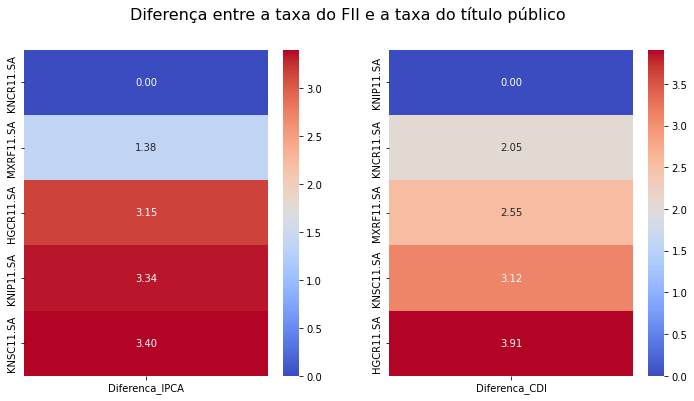

In [157]:
# Calculando a diferença entre a taxa do FII e a taxa do título
df_fii_papel['Diferenca_IPCA'] = df_fii_papel['Taxa_IPCA'] - df_titulo_publico_final.loc['IPCA_2035' ,'Taxa_Titulo']
df_fii_papel.loc['KNCR11.SA', 'Diferenca_IPCA'] = 0

df_fii_papel['Diferenca_CDI'] = df_fii_papel['Taxa_CDI'] - df_titulo_publico_final.loc['SELIC_2029' ,'Taxa_Titulo']
df_fii_papel.loc['KNIP11.SA', 'Diferenca_CDI'] = 0

# Ordenando essa diferença
df_fii_papel_diff_ipca = df_fii_papel['Diferenca_IPCA'].sort_values()
df_fii_papel_diff_cdi = df_fii_papel['Diferenca_CDI'].sort_values()

# Plotando o heatmap
fig, axes = plt.subplots(ncols=2, figsize=(12, 6))
fig.suptitle('Diferença entre a taxa do FII e a taxa do título público', fontsize=16)

sns.heatmap(
    df_fii_papel_diff_ipca.values.reshape(-1, 1), 
    annot=True, # Plotando os números dentro do gráfico
    fmt=".2f",  # Formatação para 2 casas decimais
    cmap='coolwarm', 
    yticklabels=df_fii_papel_diff_ipca.index,
    ax=axes[0]
)
axes[0].set_xticks([0.5])
axes[0].set_xticklabels(['Diferenca_IPCA'], rotation=0)

sns.heatmap(
    df_fii_papel_diff_cdi.values.reshape(-1, 1), 
    annot=True, # Plotando os números dentro do gráfico
    fmt=".2f",  # Formatação para 2 casas decimais
    cmap='coolwarm', 
    yticklabels=df_fii_papel_diff_cdi.index,
    ax=axes[1]
)
axes[1].set_xticks([0.5])
axes[1].set_xticklabels(['Diferenca_CDI'], rotation=0)

plt.show()

**Interpretação**
* Quanto maior for a diferença entre a MTM e a taxa dos títulos públicos, o FII é mais arriscado (High yield - compra CRIs que possuem maiores riscos);
* Quanto menor for a diferença entre a MTM e a taxa dos títulos públicos, o FII é mais seguro (High grade - compra CRIs que possuem menores riscos).
